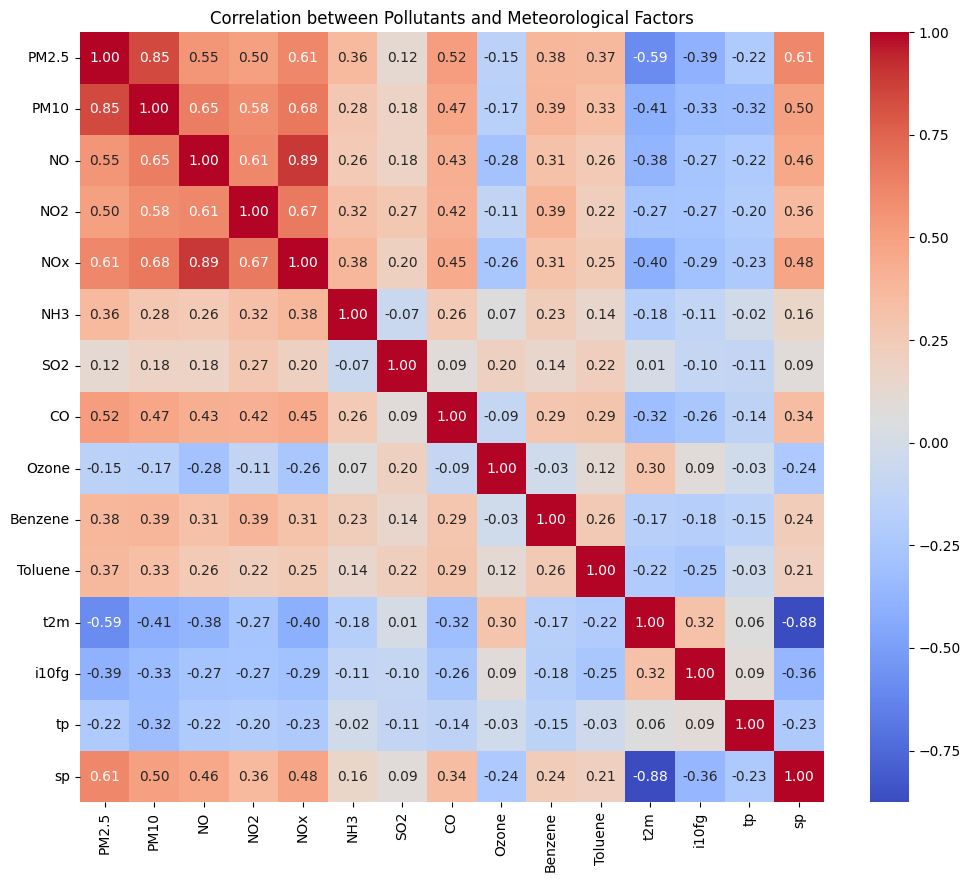

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("/content/anand_vihar_data_new.csv")

# Choose pollutants and meteorological factors for correlation
columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene', 't2m', 'i10fg', 'tp', 'sp']

# Compute correlation matrix
corr_matrix = data[columns].corr()

# Visualize using heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Pollutants and Meteorological Factors')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

# Load your dataset
data = pd.read_csv("/content/anand_vihar_data_new.csv")  # Replace with the correct path

# Define air pollutants and climate parameters
air_pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene']
climate_parameters = ['sp', 't2m', 'tp', 'i10fg']

# Initialize a dictionary to store significant parameters for each pollutant
significant_parameters = {}

# Calculate Spearman correlation for each pollutant
for pollutant in air_pollutants:
    corr_values = []
    for climate_param in climate_parameters:
        corr, p_value = spearmanr(data[pollutant], data[climate_param])
        if abs(corr) >= 0.1:  # Apply correlation threshold
            corr_values.append(climate_param)

    significant_parameters[pollutant] = corr_values

# Print significant climate parameters for each pollutant
for pollutant, params in significant_parameters.items():
    print(f"Significant parameters for {pollutant}: {params}")


Significant parameters for PM2.5: ['sp', 't2m', 'tp', 'i10fg']
Significant parameters for PM10: ['sp', 't2m', 'tp', 'i10fg']
Significant parameters for NO: ['sp', 't2m', 'tp', 'i10fg']
Significant parameters for NO2: ['sp', 't2m', 'tp', 'i10fg']
Significant parameters for NOx: ['sp', 't2m', 'tp', 'i10fg']
Significant parameters for NH3: ['sp', 't2m', 'i10fg']
Significant parameters for SO2: ['sp', 'tp']
Significant parameters for CO: ['sp', 't2m', 'tp', 'i10fg']
Significant parameters for Ozone: ['sp', 't2m']
Significant parameters for Benzene: ['sp', 't2m', 'tp', 'i10fg']
Significant parameters for Toluene: ['sp', 't2m', 'i10fg']


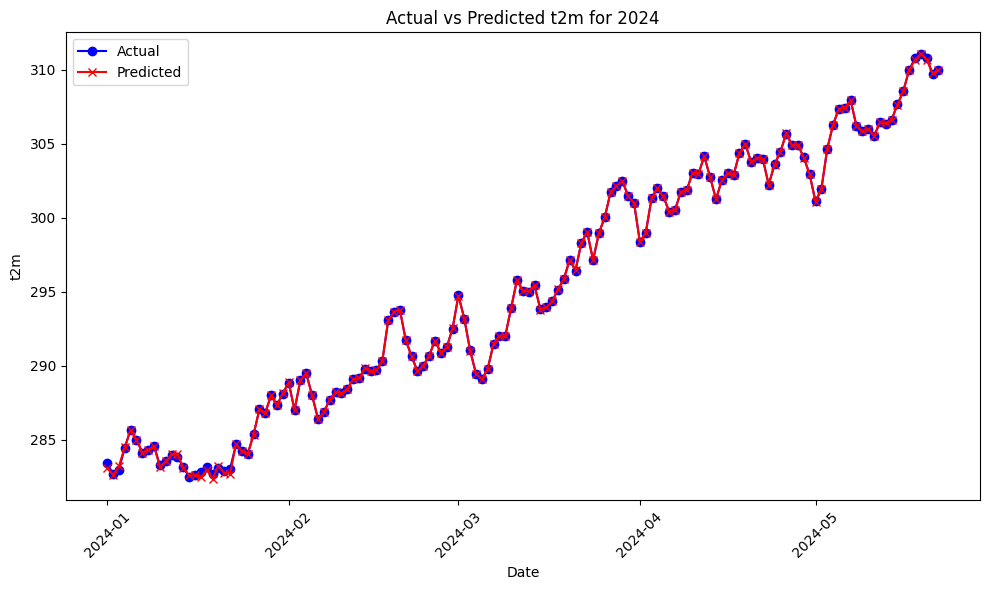

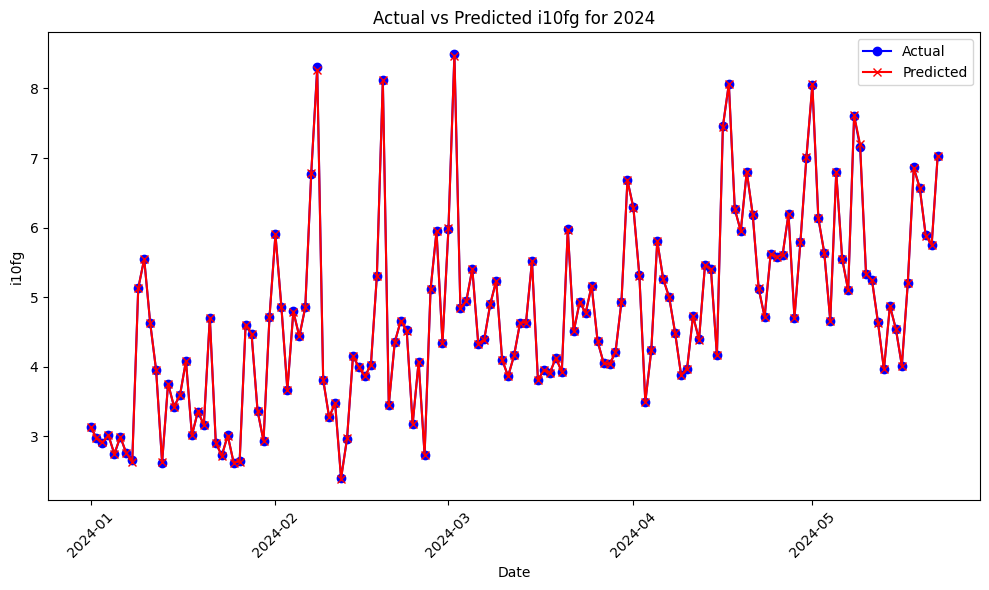

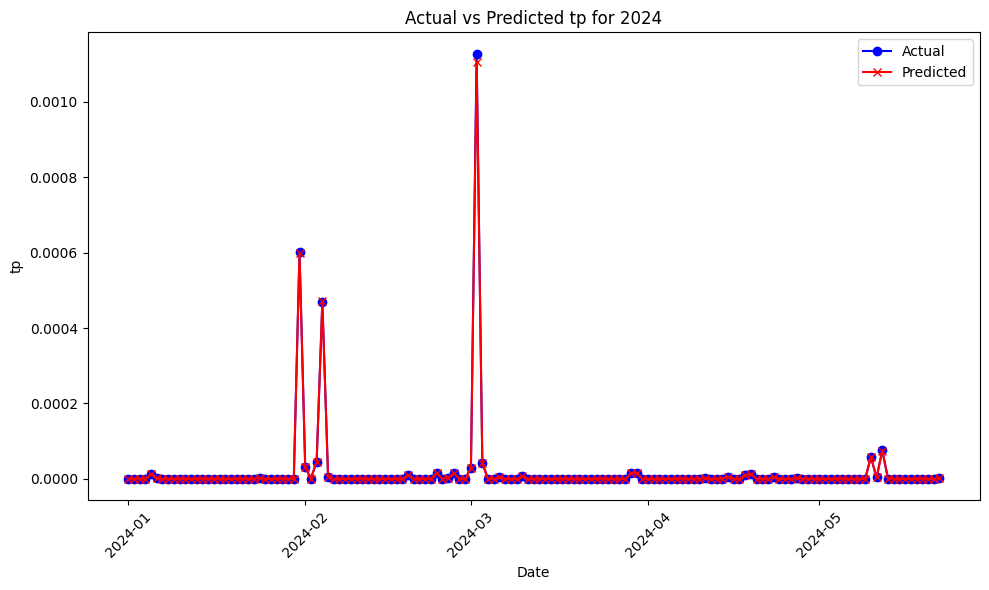

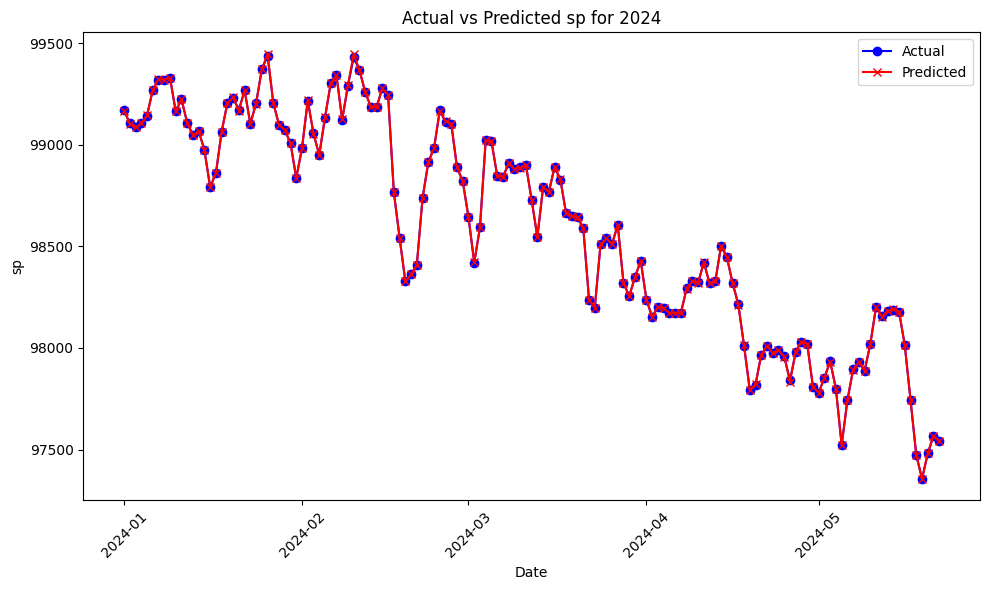

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/anand_vihar_data_new.csv")

# Convert 'From Date' to datetime and set it as index
data['From Date'] = pd.to_datetime(data['From Date'])
data.set_index('From Date', inplace=True)
data.sort_index(inplace=True)

# Define climate parameters and feature columns
meteorological_params = ['t2m', 'i10fg', 'tp', 'sp']
feature_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene'] + meteorological_params

# Filter data for 2024 and for the training set
data_2024 = data[data.index.year == 2024]
data_train = data[data.index.year < 2024]

# Initialize DataFrame for predicted climate data
predicted_climate_2024 = pd.DataFrame(index=data_2024.index)

# TimeSeriesSplit and model training for climate prediction
tscv = TimeSeriesSplit(n_splits=5)

for param in meteorological_params:
    y = data_train[param]  # target
    X = data_train[feature_columns]  # features

    # Standardization
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_2024_scaled = scaler.transform(data_2024[feature_columns])

    # Random Forest model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train the model using time series cross-validation
    for train_index, test_index in tscv.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        rf.fit(X_train, y_train)

    # Predict climate parameters for 2024
    predicted_climate_2024[param] = rf.predict(X_2024_scaled)

    # Plotting actual vs predicted climate data
    plt.figure(figsize=(10, 6))
    plt.plot(data_2024.index, data_2024[param], label='Actual', color='blue', marker='o')
    plt.plot(data_2024.index, predicted_climate_2024[param], label='Predicted', color='red', marker='x')
    plt.xlabel('Date')
    plt.ylabel(param)
    plt.title(f'Actual vs Predicted {param} for 2024')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Save predicted climate data to CSV
predicted_climate_2024.to_csv('/content/predicted_climate_2024.csv')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


R² Score for PM2.5: 0.9801
Mean Absolute Error for PM2.5: 8.3734


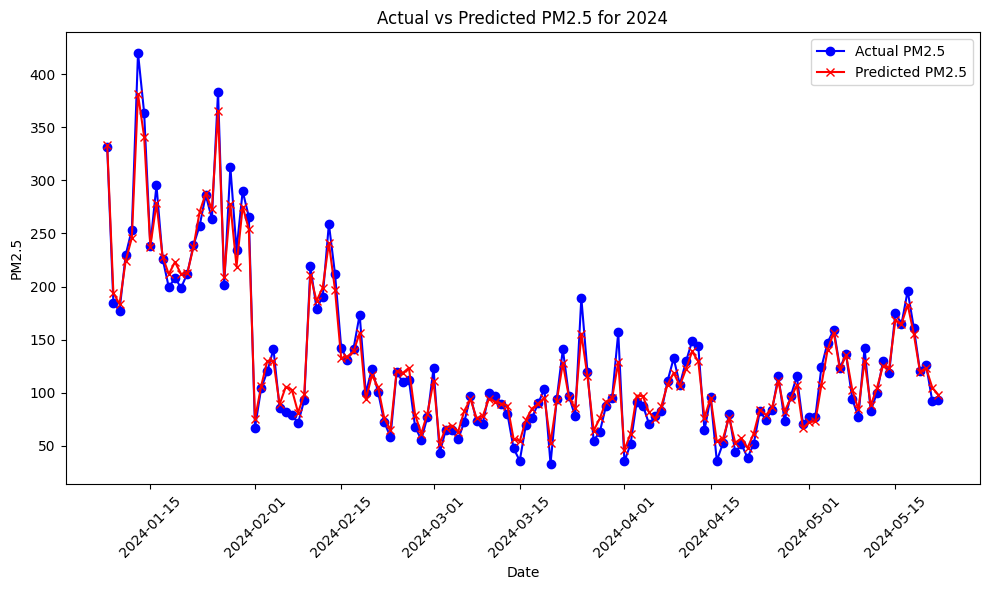

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt

# Load datasets
data = pd.read_csv("/content/anand_vihar_data_new.csv")
predicted_climate = pd.read_csv('/content/predicted_climate_2024.csv')

# Preprocess the data: Convert 'From Date' to datetime and set as index
data['From Date'] = pd.to_datetime(data['From Date'])
predicted_climate['From Date'] = pd.to_datetime(predicted_climate['From Date'])
data.set_index('From Date', inplace=True)
predicted_climate.set_index('From Date', inplace=True)

# Create lagged and rolling features for climate data
for col in ['t2m', 'i10fg', 'tp', 'sp']:
    predicted_climate[f'{col}_lag1'] = predicted_climate[col].shift(1)
    predicted_climate[f'{col}_lag7'] = predicted_climate[col].shift(7)
    predicted_climate[f'{col}_roll7'] = predicted_climate[col].rolling(window=7).mean()

# Drop rows with NaN values created by lagging/rolling
predicted_climate.dropna(inplace=True)

# Align both datasets on the same dates
aligned_data = pd.merge(data, predicted_climate, left_index=True, right_index=True, how='inner')
data_2024 = data.loc[predicted_climate.index]

# Define meteorological features and target pollutant (PM2.5)
X = predicted_climate[['t2m', 'i10fg', 'tp', 'sp'] + [f'{col}_lag1' for col in ['t2m', 'i10fg', 'tp', 'sp']]]
y = data_2024['PM2.5']

# Feature Engineering - Polynomial and interaction features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Initialize TimeSeriesSplit cross-validation
tscv = TimeSeriesSplit(n_splits=10)

# Initialize models
rf = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Random search hyperparameter tuning
param_dist_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 5]}
param_dist_gbr = {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
param_dist_xgb = {'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1], 'max_depth': [5, 7]}

# Run cross-validation for each model using RandomizedSearchCV
rf_search = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=50, cv=tscv, n_jobs=-1)
gbr_search = RandomizedSearchCV(gbr, param_distributions=param_dist_gbr, n_iter=50, cv=tscv, n_jobs=-1)
xgb_search = RandomizedSearchCV(xgb, param_distributions=param_dist_xgb, n_iter=50, cv=tscv, n_jobs=-1)

# Fit models
rf_search.fit(X_scaled, y)
gbr_search.fit(X_scaled, y)
xgb_search.fit(X_scaled, y)

# Blend the predictions (40% Random Forest, 30% Gradient Boosting, 30% XGBoost)
rf_preds = rf_search.best_estimator_.predict(X_scaled)
gbr_preds = gbr_search.best_estimator_.predict(X_scaled)
xgb_preds = xgb_search.best_estimator_.predict(X_scaled)

blended_preds = 0.4 * rf_preds + 0.3 * gbr_preds + 0.3 * xgb_preds

# Evaluate blended model
r2 = r2_score(y, blended_preds)
mae = mean_absolute_error(y, blended_preds)
print(f"R² Score for PM2.5: {r2:.4f}")
print(f"Mean Absolute Error for PM2.5: {mae:.4f}")

# Plot actual vs predicted PM2.5 for 2024
plt.figure(figsize=(10, 6))
plt.plot(data_2024.index, data_2024['PM2.5'], label='Actual PM2.5', color='blue', marker='o')
plt.plot(data_2024.index, blended_preds, label='Predicted PM2.5', color='red', marker='x')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.title('Actual vs Predicted PM2.5 for 2024')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


R² Score for PM10: 0.9292
Mean Absolute Error for PM10: 22.8238


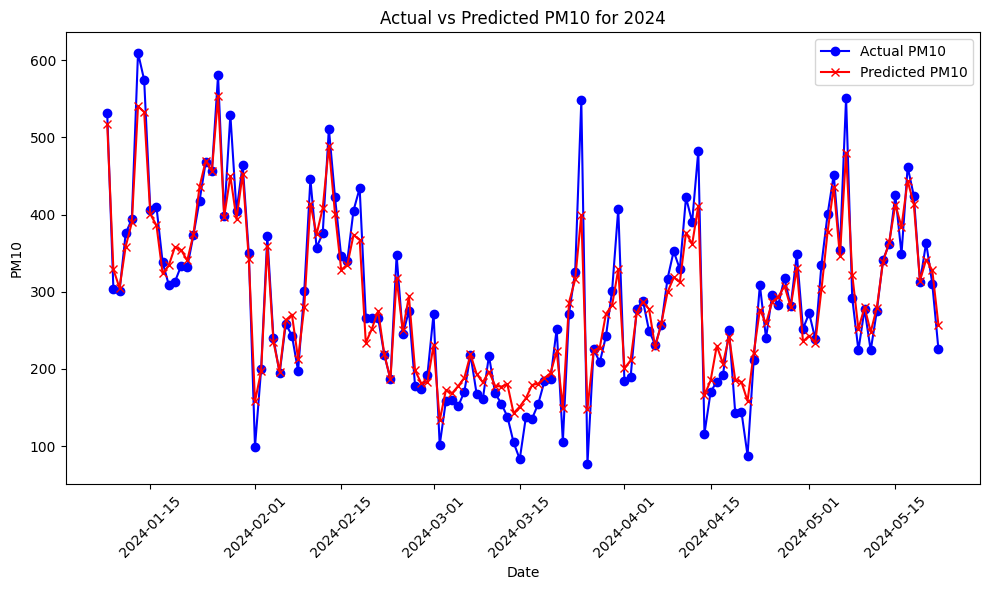

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt

# Load datasets
data = pd.read_csv("/content/anand_vihar_data_new.csv")
predicted_climate = pd.read_csv('/content/predicted_climate_2024.csv')

# Preprocess the data: Convert 'From Date' to datetime and set as index
data['From Date'] = pd.to_datetime(data['From Date'])
predicted_climate['From Date'] = pd.to_datetime(predicted_climate['From Date'])
data.set_index('From Date', inplace=True)
predicted_climate.set_index('From Date', inplace=True)

# Create lagged and rolling features for climate data
for col in ['t2m', 'i10fg', 'tp', 'sp']:
    predicted_climate[f'{col}_lag1'] = predicted_climate[col].shift(1)
    predicted_climate[f'{col}_lag7'] = predicted_climate[col].shift(7)
    predicted_climate[f'{col}_roll7'] = predicted_climate[col].rolling(window=7).mean()

# Drop rows with NaN values created by lagging/rolling
predicted_climate.dropna(inplace=True)

# Align both datasets on the same dates
aligned_data = pd.merge(data, predicted_climate, left_index=True, right_index=True, how='inner')
data_2024 = data.loc[predicted_climate.index]

# Define meteorological features and target pollutant (PM2.5)
X = predicted_climate[['t2m', 'i10fg', 'tp', 'sp'] + [f'{col}_lag1' for col in ['t2m', 'i10fg', 'tp', 'sp']]]
y = data_2024['PM10']

# Feature Engineering - Polynomial and interaction features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Initialize TimeSeriesSplit cross-validation
tscv = TimeSeriesSplit(n_splits=10)

# Initialize models
rf = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Random search hyperparameter tuning
param_dist_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 5]}
param_dist_gbr = {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
param_dist_xgb = {'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1], 'max_depth': [5, 7]}

# Run cross-validation for each model using RandomizedSearchCV
rf_search = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=50, cv=tscv, n_jobs=-1)
gbr_search = RandomizedSearchCV(gbr, param_distributions=param_dist_gbr, n_iter=50, cv=tscv, n_jobs=-1)
xgb_search = RandomizedSearchCV(xgb, param_distributions=param_dist_xgb, n_iter=50, cv=tscv, n_jobs=-1)

# Fit models
rf_search.fit(X_scaled, y)
gbr_search.fit(X_scaled, y)
xgb_search.fit(X_scaled, y)

# Blend the predictions (40% Random Forest, 30% Gradient Boosting, 30% XGBoost)
rf_preds = rf_search.best_estimator_.predict(X_scaled)
gbr_preds = gbr_search.best_estimator_.predict(X_scaled)
xgb_preds = xgb_search.best_estimator_.predict(X_scaled)

blended_preds = 0.4 * rf_preds + 0.3 * gbr_preds + 0.3 * xgb_preds

# Evaluate blended model
r2 = r2_score(y, blended_preds)
mae = mean_absolute_error(y, blended_preds)
print(f"R² Score for PM10: {r2:.4f}")
print(f"Mean Absolute Error for PM10: {mae:.4f}")

# Plot actual vs predicted PM2.5 for 2024
plt.figure(figsize=(10, 6))
plt.plot(data_2024.index, data_2024['PM10'], label='Actual PM10', color='blue', marker='o')
plt.plot(data_2024.index, blended_preds, label='Predicted PM10', color='red', marker='x')
plt.xlabel('Date')
plt.ylabel('PM10')
plt.title('Actual vs Predicted PM10 for 2024')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


R² Score for NO: 0.9540
Mean Absolute Error for NO: 6.9062


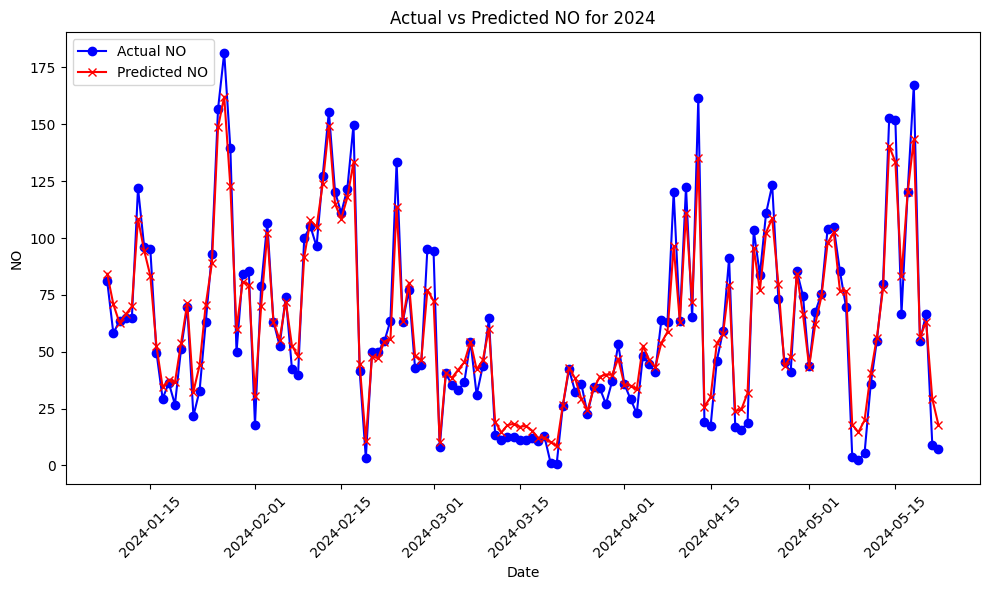

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt

# Load datasets
data = pd.read_csv("/content/anand_vihar_data_new.csv")
predicted_climate = pd.read_csv('/content/predicted_climate_2024.csv')

# Preprocess the data: Convert 'From Date' to datetime and set as index
data['From Date'] = pd.to_datetime(data['From Date'])
predicted_climate['From Date'] = pd.to_datetime(predicted_climate['From Date'])
data.set_index('From Date', inplace=True)
predicted_climate.set_index('From Date', inplace=True)

# Create lagged and rolling features for climate data
for col in ['t2m', 'i10fg', 'tp', 'sp']:
    predicted_climate[f'{col}_lag1'] = predicted_climate[col].shift(1)
    predicted_climate[f'{col}_lag7'] = predicted_climate[col].shift(7)
    predicted_climate[f'{col}_roll7'] = predicted_climate[col].rolling(window=7).mean()

# Drop rows with NaN values created by lagging/rolling
predicted_climate.dropna(inplace=True)

# Align both datasets on the same dates
aligned_data = pd.merge(data, predicted_climate, left_index=True, right_index=True, how='inner')
data_2024 = data.loc[predicted_climate.index]

# Define meteorological features and target pollutant (PM2.5)
X = predicted_climate[['t2m', 'i10fg', 'tp', 'sp'] + [f'{col}_lag1' for col in ['t2m', 'i10fg', 'tp', 'sp']]]
y = data_2024['NO']

# Feature Engineering - Polynomial and interaction features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Initialize TimeSeriesSplit cross-validation
tscv = TimeSeriesSplit(n_splits=10)

# Initialize models
rf = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Random search hyperparameter tuning
param_dist_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 5]}
param_dist_gbr = {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
param_dist_xgb = {'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1], 'max_depth': [5, 7]}

# Run cross-validation for each model using RandomizedSearchCV
rf_search = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=50, cv=tscv, n_jobs=-1)
gbr_search = RandomizedSearchCV(gbr, param_distributions=param_dist_gbr, n_iter=50, cv=tscv, n_jobs=-1)
xgb_search = RandomizedSearchCV(xgb, param_distributions=param_dist_xgb, n_iter=50, cv=tscv, n_jobs=-1)

# Fit models
rf_search.fit(X_scaled, y)
gbr_search.fit(X_scaled, y)
xgb_search.fit(X_scaled, y)

# Blend the predictions (40% Random Forest, 30% Gradient Boosting, 30% XGBoost)
rf_preds = rf_search.best_estimator_.predict(X_scaled)
gbr_preds = gbr_search.best_estimator_.predict(X_scaled)
xgb_preds = xgb_search.best_estimator_.predict(X_scaled)

blended_preds = 0.4 * rf_preds + 0.3 * gbr_preds + 0.3 * xgb_preds

# Evaluate blended model
r2 = r2_score(y, blended_preds)
mae = mean_absolute_error(y, blended_preds)
print(f"R² Score for NO: {r2:.4f}")
print(f"Mean Absolute Error for NO: {mae:.4f}")

# Plot actual vs predicted PM2.5 for 2024
plt.figure(figsize=(10, 6))
plt.plot(data_2024.index, data_2024['NO'], label='Actual NO', color='blue', marker='o')
plt.plot(data_2024.index, blended_preds, label='Predicted NO', color='red', marker='x')
plt.xlabel('Date')
plt.ylabel('NO')
plt.title('Actual vs Predicted NO for 2024')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


R² Score for NO2: 0.8731
Mean Absolute Error for NO2: 7.3308


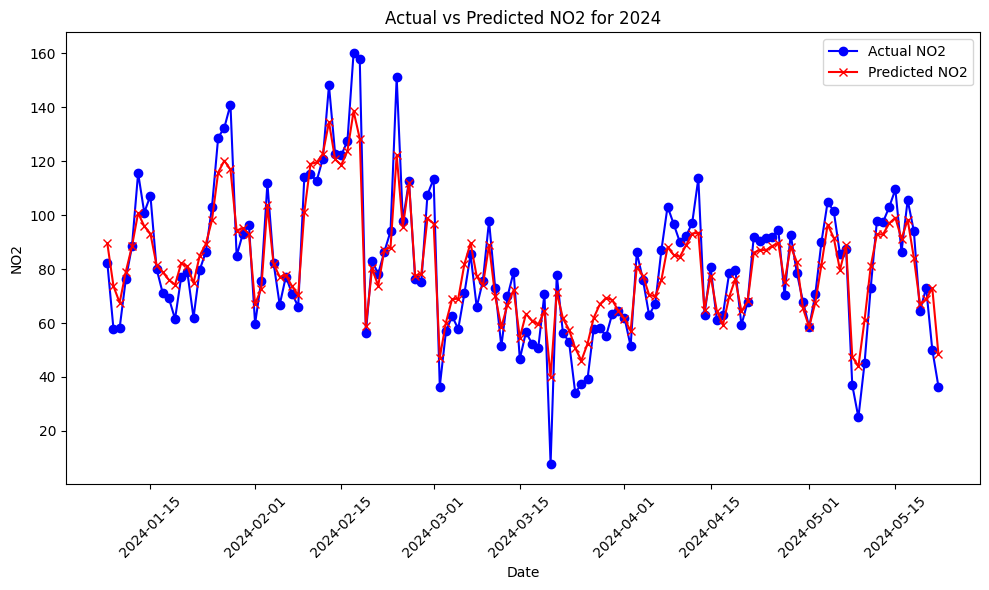

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt

# Load datasets
data = pd.read_csv("/content/anand_vihar_data_new.csv")
predicted_climate = pd.read_csv('/content/predicted_climate_2024.csv')

# Preprocess the data: Convert 'From Date' to datetime and set as index
data['From Date'] = pd.to_datetime(data['From Date'])
predicted_climate['From Date'] = pd.to_datetime(predicted_climate['From Date'])
data.set_index('From Date', inplace=True)
predicted_climate.set_index('From Date', inplace=True)

# Create lagged and rolling features for climate data
for col in ['t2m', 'i10fg', 'tp', 'sp']:
    predicted_climate[f'{col}_lag1'] = predicted_climate[col].shift(1)
    predicted_climate[f'{col}_lag7'] = predicted_climate[col].shift(7)
    predicted_climate[f'{col}_roll7'] = predicted_climate[col].rolling(window=7).mean()

# Drop rows with NaN values created by lagging/rolling
predicted_climate.dropna(inplace=True)

# Align both datasets on the same dates
aligned_data = pd.merge(data, predicted_climate, left_index=True, right_index=True, how='inner')
data_2024 = data.loc[predicted_climate.index]

# Define meteorological features and target pollutant (PM2.5)
X = predicted_climate[['t2m', 'i10fg', 'tp', 'sp'] + [f'{col}_lag1' for col in ['t2m', 'i10fg', 'tp', 'sp']]]
y = data_2024['NO2']

# Feature Engineering - Polynomial and interaction features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Initialize TimeSeriesSplit cross-validation
tscv = TimeSeriesSplit(n_splits=10)

# Initialize models
rf = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Random search hyperparameter tuning
param_dist_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 5]}
param_dist_gbr = {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
param_dist_xgb = {'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1], 'max_depth': [5, 7]}

# Run cross-validation for each model using RandomizedSearchCV
rf_search = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=50, cv=tscv, n_jobs=-1)
gbr_search = RandomizedSearchCV(gbr, param_distributions=param_dist_gbr, n_iter=50, cv=tscv, n_jobs=-1)
xgb_search = RandomizedSearchCV(xgb, param_distributions=param_dist_xgb, n_iter=50, cv=tscv, n_jobs=-1)

# Fit models
rf_search.fit(X_scaled, y)
gbr_search.fit(X_scaled, y)
xgb_search.fit(X_scaled, y)

# Blend the predictions (40% Random Forest, 30% Gradient Boosting, 30% XGBoost)
rf_preds = rf_search.best_estimator_.predict(X_scaled)
gbr_preds = gbr_search.best_estimator_.predict(X_scaled)
xgb_preds = xgb_search.best_estimator_.predict(X_scaled)

blended_preds = 0.4 * rf_preds + 0.3 * gbr_preds + 0.3 * xgb_preds

# Evaluate blended model
r2 = r2_score(y, blended_preds)
mae = mean_absolute_error(y, blended_preds)
print(f"R² Score for NO2: {r2:.4f}")
print(f"Mean Absolute Error for NO2: {mae:.4f}")

# Plot actual vs predicted PM2.5 for 2024
plt.figure(figsize=(10, 6))
plt.plot(data_2024.index, data_2024['NO2'], label='Actual NO2', color='blue', marker='o')
plt.plot(data_2024.index, blended_preds, label='Predicted NO2', color='red', marker='x')
plt.xlabel('Date')
plt.ylabel('NO2')
plt.title('Actual vs Predicted NO2 for 2024')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


R² Score for NOx: 0.8881
Mean Absolute Error for NOx: 11.8368


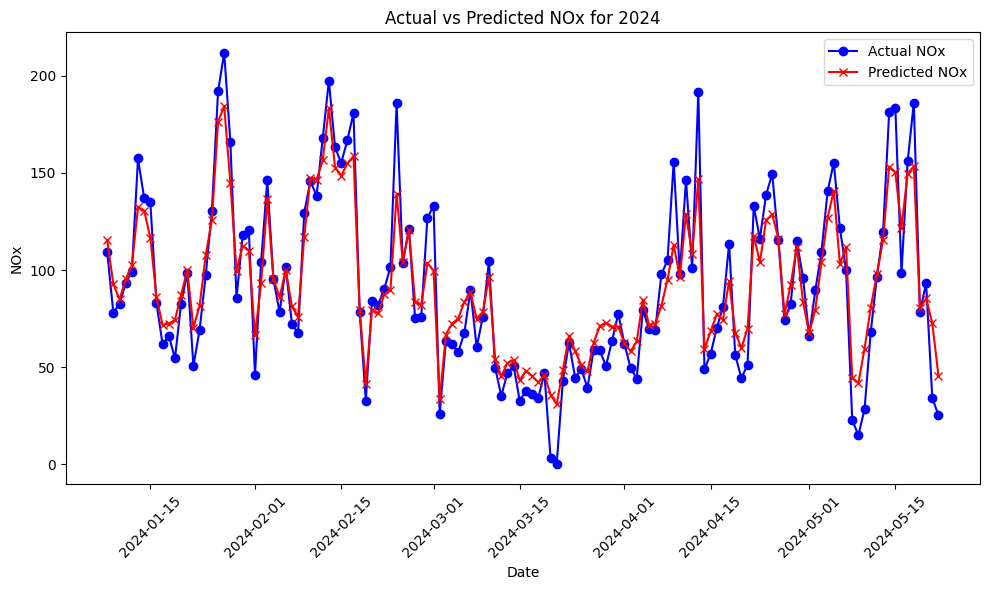

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt

# Load datasets
data = pd.read_csv("/content/anand_vihar_data_new.csv")
predicted_climate = pd.read_csv('/content/predicted_climate_2024.csv')

# Preprocess the data: Convert 'From Date' to datetime and set as index
data['From Date'] = pd.to_datetime(data['From Date'])
predicted_climate['From Date'] = pd.to_datetime(predicted_climate['From Date'])
data.set_index('From Date', inplace=True)
predicted_climate.set_index('From Date', inplace=True)

# Create lagged and rolling features for climate data
for col in ['t2m', 'i10fg', 'tp', 'sp']:
    predicted_climate[f'{col}_lag1'] = predicted_climate[col].shift(1)
    predicted_climate[f'{col}_lag7'] = predicted_climate[col].shift(7)
    predicted_climate[f'{col}_roll7'] = predicted_climate[col].rolling(window=7).mean()

# Drop rows with NaN values created by lagging/rolling
predicted_climate.dropna(inplace=True)

# Align both datasets on the same dates
aligned_data = pd.merge(data, predicted_climate, left_index=True, right_index=True, how='inner')
data_2024 = data.loc[predicted_climate.index]

# Define meteorological features and target pollutant (PM2.5)
X = predicted_climate[['t2m', 'i10fg', 'tp', 'sp'] + [f'{col}_lag1' for col in ['t2m', 'i10fg', 'tp', 'sp']]]
y = data_2024['NOx']

# Feature Engineering - Polynomial and interaction features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Initialize TimeSeriesSplit cross-validation
tscv = TimeSeriesSplit(n_splits=10)

# Initialize models
rf = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Random search hyperparameter tuning
param_dist_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 5]}
param_dist_gbr = {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
param_dist_xgb = {'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1], 'max_depth': [5, 7]}

# Run cross-validation for each model using RandomizedSearchCV
rf_search = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=50, cv=tscv, n_jobs=-1)
gbr_search = RandomizedSearchCV(gbr, param_distributions=param_dist_gbr, n_iter=50, cv=tscv, n_jobs=-1)
xgb_search = RandomizedSearchCV(xgb, param_distributions=param_dist_xgb, n_iter=50, cv=tscv, n_jobs=-1)

# Fit models
rf_search.fit(X_scaled, y)
gbr_search.fit(X_scaled, y)
xgb_search.fit(X_scaled, y)

# Blend the predictions (40% Random Forest, 30% Gradient Boosting, 30% XGBoost)
rf_preds = rf_search.best_estimator_.predict(X_scaled)
gbr_preds = gbr_search.best_estimator_.predict(X_scaled)
xgb_preds = xgb_search.best_estimator_.predict(X_scaled)

blended_preds = 0.4 * rf_preds + 0.3 * gbr_preds + 0.3 * xgb_preds

# Evaluate blended model
r2 = r2_score(y, blended_preds)
mae = mean_absolute_error(y, blended_preds)
print(f"R² Score for NOx: {r2:.4f}")
print(f"Mean Absolute Error for NOx: {mae:.4f}")

# Plot actual vs predicted PM2.5 for 2024
plt.figure(figsize=(10, 6))
plt.plot(data_2024.index, data_2024['NOx'], label='Actual NOx', color='blue', marker='o')
plt.plot(data_2024.index, blended_preds, label='Predicted NOx', color='red', marker='x')
plt.xlabel('Date')
plt.ylabel('NOx')
plt.title('Actual vs Predicted NOx for 2024')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


R² Score for NH3: 0.8897
Mean Absolute Error for NH3: 3.3081


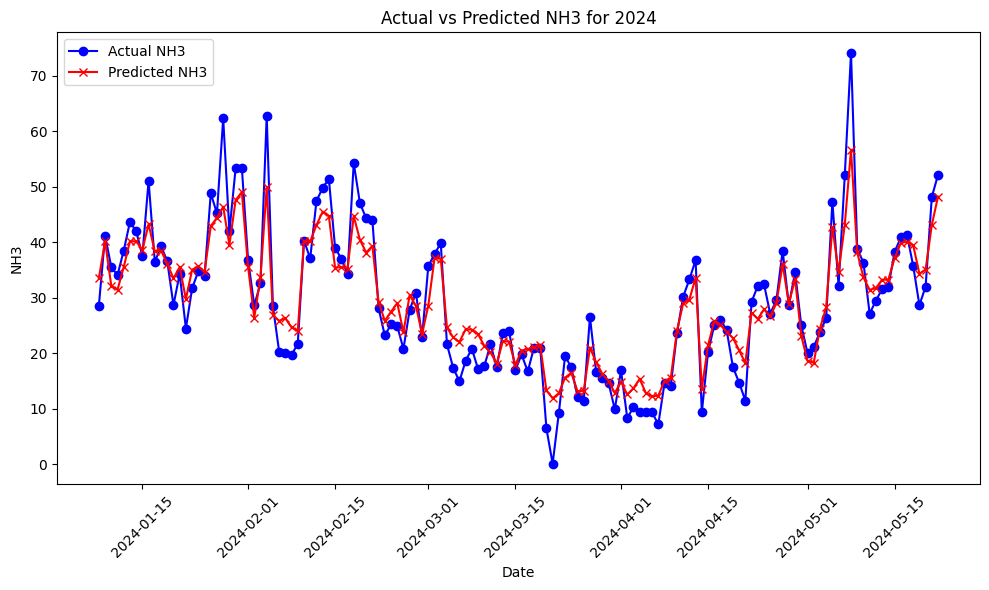

In [ ]:
#Significant parameters for NH3: ['sp', 't2m', 'i10fg']

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt

# Load datasets
data = pd.read_csv("/content/anand_vihar_data_new.csv")
predicted_climate = pd.read_csv('/content/predicted_climate_2024.csv')

# Preprocess the data: Convert 'From Date' to datetime and set as index
data['From Date'] = pd.to_datetime(data['From Date'])
predicted_climate['From Date'] = pd.to_datetime(predicted_climate['From Date'])
data.set_index('From Date', inplace=True)
predicted_climate.set_index('From Date', inplace=True)

# Create lagged and rolling features for climate data
for col in ['t2m', 'i10fg', 'sp']:
    predicted_climate[f'{col}_lag1'] = predicted_climate[col].shift(1)
    predicted_climate[f'{col}_lag7'] = predicted_climate[col].shift(7)
    predicted_climate[f'{col}_roll7'] = predicted_climate[col].rolling(window=7).mean()

# Drop rows with NaN values created by lagging/rolling
predicted_climate.dropna(inplace=True)

# Align both datasets on the same dates
aligned_data = pd.merge(data, predicted_climate, left_index=True, right_index=True, how='inner')
data_2024 = data.loc[predicted_climate.index]

# Define meteorological features and target pollutant (PM2.5)
X = predicted_climate[['t2m', 'i10fg', 'sp'] + [f'{col}_lag1' for col in ['t2m', 'i10fg', 'sp']]]
#Significant parameters for NH3: ['sp', 't2m', 'i10fg']
#Significant parameters for NH3: ['sp', 't2m', 'i10fg']
y = data_2024['NH3']

# Feature Engineering - Polynomial and interaction features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Initialize TimeSeriesSplit cross-validation
tscv = TimeSeriesSplit(n_splits=10)

# Initialize models
rf = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Random search hyperparameter tuning
param_dist_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 5]}
param_dist_gbr = {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
param_dist_xgb = {'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1], 'max_depth': [5, 7]}

# Run cross-validation for each model using RandomizedSearchCV
rf_search = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=50, cv=tscv, n_jobs=-1)
gbr_search = RandomizedSearchCV(gbr, param_distributions=param_dist_gbr, n_iter=50, cv=tscv, n_jobs=-1)
xgb_search = RandomizedSearchCV(xgb, param_distributions=param_dist_xgb, n_iter=50, cv=tscv, n_jobs=-1)

# Fit models
rf_search.fit(X_scaled, y)
gbr_search.fit(X_scaled, y)
xgb_search.fit(X_scaled, y)

# Blend the predictions (40% Random Forest, 30% Gradient Boosting, 30% XGBoost)
rf_preds = rf_search.best_estimator_.predict(X_scaled)
gbr_preds = gbr_search.best_estimator_.predict(X_scaled)
xgb_preds = xgb_search.best_estimator_.predict(X_scaled)

blended_preds = 0.4 * rf_preds + 0.3 * gbr_preds + 0.3 * xgb_preds

# Evaluate blended model
r2 = r2_score(y, blended_preds)
mae = mean_absolute_error(y, blended_preds)
print(f"R² Score for NH3: {r2:.4f}")
print(f"Mean Absolute Error for NH3: {mae:.4f}")

# Plot actual vs predicted PM2.5 for 2024
plt.figure(figsize=(10, 6))
plt.plot(data_2024.index, data_2024['NH3'], label='Actual NH3', color='blue', marker='o')
plt.plot(data_2024.index, blended_preds, label='Predicted NH3', color='red', marker='x')
plt.xlabel('Date')
plt.ylabel('NH3')
plt.title('Actual vs Predicted NH3 for 2024')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


R² Score for SO2: 0.6640
Mean Absolute Error for SO2: 4.6357


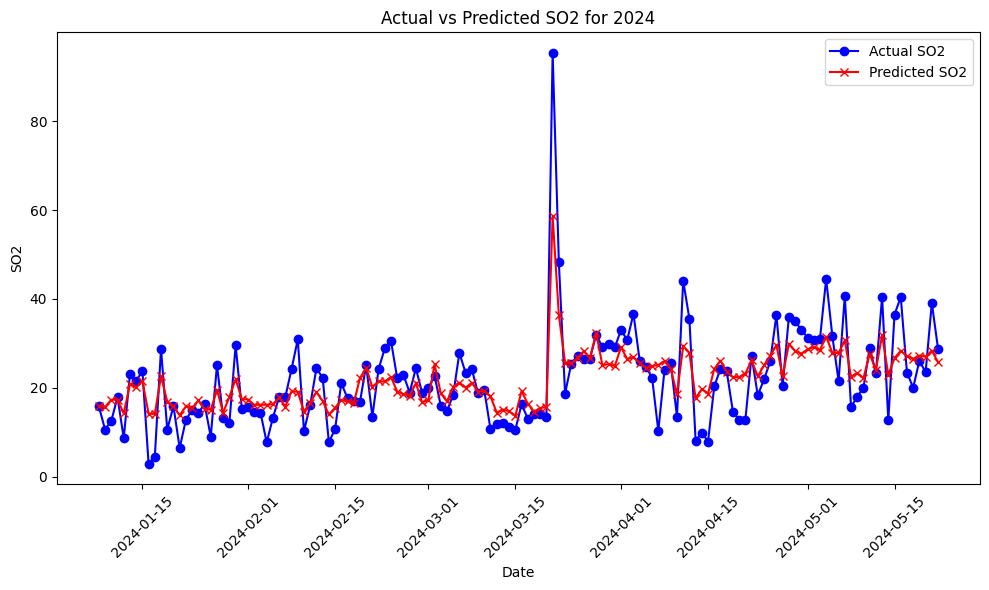

In [ ]:
#Significant parameters for PM2.5: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for PM10: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for NO: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for NO2: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for NOx: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for NH3: ['sp', 't2m', 'i10fg']
#Significant parameters for SO2: ['sp', 'tp']
#Significant parameters for CO: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for Ozone: ['sp', 't2m']
#Significant parameters for Benzene: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for Toluene: ['sp', 't2m', 'i10fg']

#Significant parameters for NH3: ['sp', 't2m', 'i10fg']

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt

# Load datasets
data = pd.read_csv("/content/anand_vihar_data_new.csv")
predicted_climate = pd.read_csv('/content/predicted_climate_2024.csv')

# Preprocess the data: Convert 'From Date' to datetime and set as index
data['From Date'] = pd.to_datetime(data['From Date'])
predicted_climate['From Date'] = pd.to_datetime(predicted_climate['From Date'])
data.set_index('From Date', inplace=True)
predicted_climate.set_index('From Date', inplace=True)

# Create lagged and rolling features for climate data
for col in ['sp', 'tp']:
    predicted_climate[f'{col}_lag1'] = predicted_climate[col].shift(1)
    predicted_climate[f'{col}_lag7'] = predicted_climate[col].shift(7)
    predicted_climate[f'{col}_roll7'] = predicted_climate[col].rolling(window=7).mean()

# Drop rows with NaN values created by lagging/rolling
predicted_climate.dropna(inplace=True)

# Align both datasets on the same dates
aligned_data = pd.merge(data, predicted_climate, left_index=True, right_index=True, how='inner')
data_2024 = data.loc[predicted_climate.index]

# Define meteorological features and target pollutant (PM2.5)
X = predicted_climate[['sp', 'tp'] + [f'{col}_lag1' for col in ['sp', 'tp']]]

y = data_2024['SO2']

# Feature Engineering - Polynomial and interaction features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Initialize TimeSeriesSplit cross-validation
tscv = TimeSeriesSplit(n_splits=10)

# Initialize models
rf = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Random search hyperparameter tuning
param_dist_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 5]}
param_dist_gbr = {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
param_dist_xgb = {'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1], 'max_depth': [5, 7]}

# Run cross-validation for each model using RandomizedSearchCV
rf_search = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=50, cv=tscv, n_jobs=-1)
gbr_search = RandomizedSearchCV(gbr, param_distributions=param_dist_gbr, n_iter=50, cv=tscv, n_jobs=-1)
xgb_search = RandomizedSearchCV(xgb, param_distributions=param_dist_xgb, n_iter=50, cv=tscv, n_jobs=-1)

# Fit models
rf_search.fit(X_scaled, y)
gbr_search.fit(X_scaled, y)
xgb_search.fit(X_scaled, y)

# Blend the predictions (40% Random Forest, 30% Gradient Boosting, 30% XGBoost)
rf_preds = rf_search.best_estimator_.predict(X_scaled)
gbr_preds = gbr_search.best_estimator_.predict(X_scaled)
xgb_preds = xgb_search.best_estimator_.predict(X_scaled)

blended_preds = 0.4 * rf_preds + 0.3 * gbr_preds + 0.3 * xgb_preds

# Evaluate blended model
r2 = r2_score(y, blended_preds)
mae = mean_absolute_error(y, blended_preds)
print(f"R² Score for SO2: {r2:.4f}")
print(f"Mean Absolute Error for SO2: {mae:.4f}")

# Plot actual vs predicted PM2.5 for 2024
plt.figure(figsize=(10, 6))
plt.plot(data_2024.index, data_2024['SO2'], label='Actual SO2', color='blue', marker='o')
plt.plot(data_2024.index, blended_preds, label='Predicted SO2', color='red', marker='x')
plt.xlabel('Date')
plt.ylabel('SO2')
plt.title('Actual vs Predicted SO2 for 2024')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


R² Score for CO: 0.8218
Mean Absolute Error for CO: 0.3722


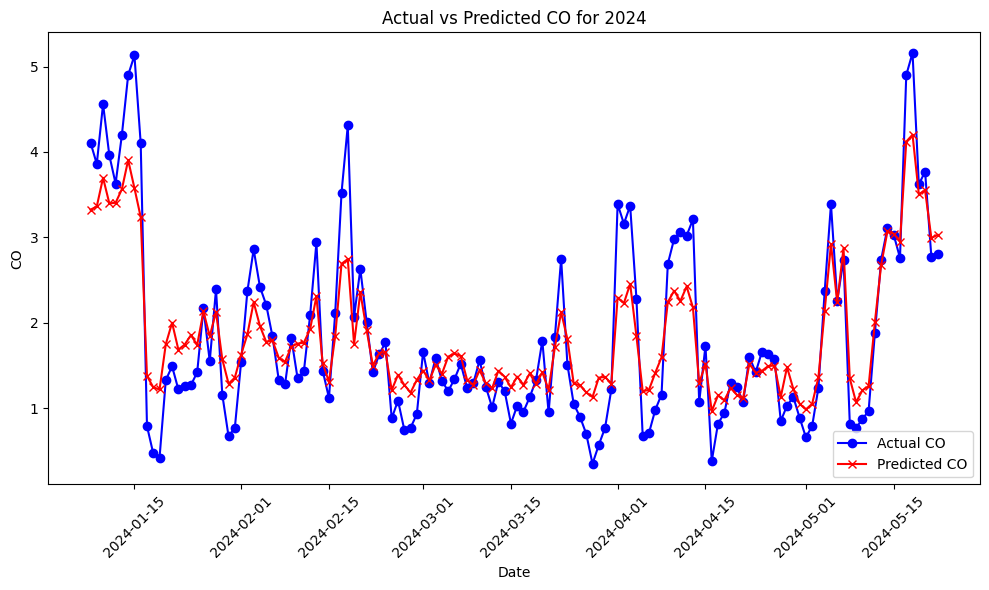

In [ ]:
#Significant parameters for PM2.5: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for PM10: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for NO: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for NO2: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for NOx: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for NH3: ['sp', 't2m', 'i10fg']
#Significant parameters for SO2: ['sp', 'tp']
#Significant parameters for CO: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for Ozone: ['sp', 't2m']
#Significant parameters for Benzene: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for Toluene: ['sp', 't2m', 'i10fg']

#Significant parameters for NH3: ['sp', 't2m', 'i10fg']

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt

# Load datasets
data = pd.read_csv("/content/anand_vihar_data_new.csv")
predicted_climate = pd.read_csv('/content/predicted_climate_2024.csv')

# Preprocess the data: Convert 'From Date' to datetime and set as index
data['From Date'] = pd.to_datetime(data['From Date'])
predicted_climate['From Date'] = pd.to_datetime(predicted_climate['From Date'])
data.set_index('From Date', inplace=True)
predicted_climate.set_index('From Date', inplace=True)

# Create lagged and rolling features for climate data
for col in ['sp', 't2m', 'tp', 'i10fg']:
    predicted_climate[f'{col}_lag1'] = predicted_climate[col].shift(1)
    predicted_climate[f'{col}_lag7'] = predicted_climate[col].shift(7)
    predicted_climate[f'{col}_roll7'] = predicted_climate[col].rolling(window=7).mean()

# Drop rows with NaN values created by lagging/rolling
predicted_climate.dropna(inplace=True)

# Align both datasets on the same dates
aligned_data = pd.merge(data, predicted_climate, left_index=True, right_index=True, how='inner')
data_2024 = data.loc[predicted_climate.index]

# Define meteorological features and target pollutant (PM2.5)
X = predicted_climate[['sp', 't2m', 'tp', 'i10fg'] + [f'{col}_lag1' for col in ['sp', 't2m', 'tp', 'i10fg']]]

y = data_2024['CO']

# Feature Engineering - Polynomial and interaction features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Initialize TimeSeriesSplit cross-validation
tscv = TimeSeriesSplit(n_splits=10)

# Initialize models
rf = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Random search hyperparameter tuning
param_dist_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 5]}
param_dist_gbr = {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
param_dist_xgb = {'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1], 'max_depth': [5, 7]}

# Run cross-validation for each model using RandomizedSearchCV
rf_search = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=50, cv=tscv, n_jobs=-1)
gbr_search = RandomizedSearchCV(gbr, param_distributions=param_dist_gbr, n_iter=50, cv=tscv, n_jobs=-1)
xgb_search = RandomizedSearchCV(xgb, param_distributions=param_dist_xgb, n_iter=50, cv=tscv, n_jobs=-1)

# Fit models
rf_search.fit(X_scaled, y)
gbr_search.fit(X_scaled, y)
xgb_search.fit(X_scaled, y)

# Blend the predictions (40% Random Forest, 30% Gradient Boosting, 30% XGBoost)
rf_preds = rf_search.best_estimator_.predict(X_scaled)
gbr_preds = gbr_search.best_estimator_.predict(X_scaled)
xgb_preds = xgb_search.best_estimator_.predict(X_scaled)

blended_preds = 0.4 * rf_preds + 0.3 * gbr_preds + 0.3 * xgb_preds

# Evaluate blended model
r2 = r2_score(y, blended_preds)
mae = mean_absolute_error(y, blended_preds)
print(f"R² Score for CO: {r2:.4f}")
print(f"Mean Absolute Error for CO: {mae:.4f}")

# Plot actual vs predicted PM2.5 for 2024
plt.figure(figsize=(10, 6))
plt.plot(data_2024.index, data_2024['CO'], label='Actual CO', color='blue', marker='o')
plt.plot(data_2024.index, blended_preds, label='Predicted CO', color='red', marker='x')
plt.xlabel('Date')
plt.ylabel('CO')
plt.title('Actual vs Predicted CO for 2024')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


R² Score for Ozone: 0.8715
Mean Absolute Error for Ozone: 4.3719


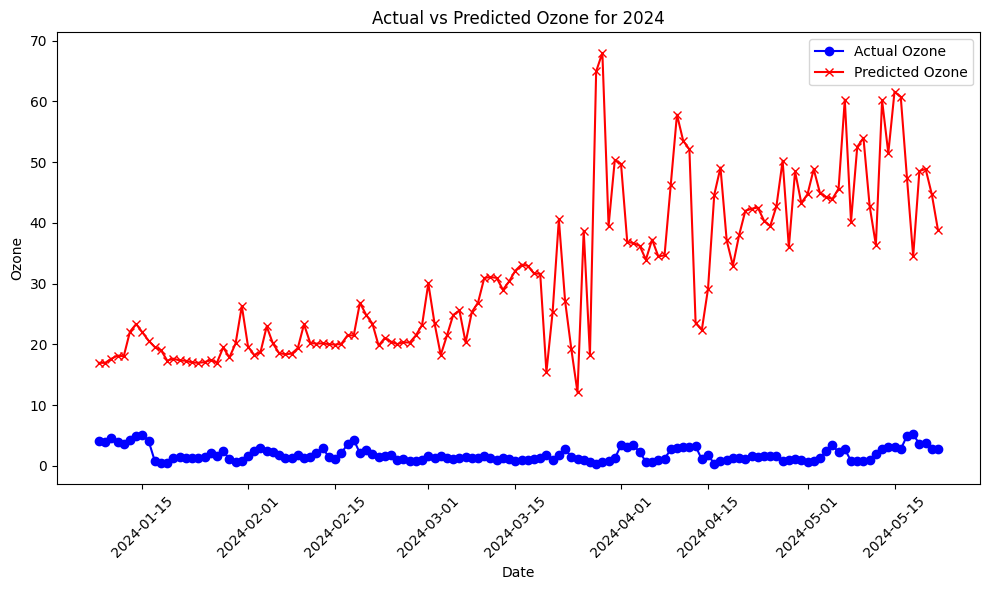

In [ ]:
#Significant parameters for PM2.5: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for PM10: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for NO: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for NO2: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for NOx: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for NH3: ['sp', 't2m', 'i10fg']
#Significant parameters for SO2: ['sp', 'tp']
#Significant parameters for CO: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for Ozone: ['sp', 't2m']
#Significant parameters for Benzene: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for Toluene: ['sp', 't2m', 'i10fg']

#Significant parameters for NH3: ['sp', 't2m', 'i10fg']

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt

# Load datasets
data = pd.read_csv("/content/anand_vihar_data_new.csv")
predicted_climate = pd.read_csv('/content/predicted_climate_2024.csv')

# Preprocess the data: Convert 'From Date' to datetime and set as index
data['From Date'] = pd.to_datetime(data['From Date'])
predicted_climate['From Date'] = pd.to_datetime(predicted_climate['From Date'])
data.set_index('From Date', inplace=True)
predicted_climate.set_index('From Date', inplace=True)

# Create lagged and rolling features for climate data
for col in ['sp', 't2m']:
    predicted_climate[f'{col}_lag1'] = predicted_climate[col].shift(1)
    predicted_climate[f'{col}_lag7'] = predicted_climate[col].shift(7)
    predicted_climate[f'{col}_roll7'] = predicted_climate[col].rolling(window=7).mean()

# Drop rows with NaN values created by lagging/rolling
predicted_climate.dropna(inplace=True)

# Align both datasets on the same dates
aligned_data = pd.merge(data, predicted_climate, left_index=True, right_index=True, how='inner')
data_2024 = data.loc[predicted_climate.index]

# Define meteorological features and target pollutant (PM2.5)
X = predicted_climate[['sp', 't2m'] + [f'{col}_lag1' for col in ['sp', 't2m']]]

y = data_2024['Ozone']

# Feature Engineering - Polynomial and interaction features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Initialize TimeSeriesSplit cross-validation
tscv = TimeSeriesSplit(n_splits=10)

# Initialize models
rf = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Random search hyperparameter tuning
param_dist_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 5]}
param_dist_gbr = {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
param_dist_xgb = {'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1], 'max_depth': [5, 7]}

# Run cross-validation for each model using RandomizedSearchCV
rf_search = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=50, cv=tscv, n_jobs=-1)
gbr_search = RandomizedSearchCV(gbr, param_distributions=param_dist_gbr, n_iter=50, cv=tscv, n_jobs=-1)
xgb_search = RandomizedSearchCV(xgb, param_distributions=param_dist_xgb, n_iter=50, cv=tscv, n_jobs=-1)

# Fit models
rf_search.fit(X_scaled, y)
gbr_search.fit(X_scaled, y)
xgb_search.fit(X_scaled, y)

# Blend the predictions (40% Random Forest, 30% Gradient Boosting, 30% XGBoost)
rf_preds = rf_search.best_estimator_.predict(X_scaled)
gbr_preds = gbr_search.best_estimator_.predict(X_scaled)
xgb_preds = xgb_search.best_estimator_.predict(X_scaled)

blended_preds = 0.4 * rf_preds + 0.3 * gbr_preds + 0.3 * xgb_preds

# Evaluate blended model
r2 = r2_score(y, blended_preds)
mae = mean_absolute_error(y, blended_preds)
print(f"R² Score for Ozone: {r2:.4f}")
print(f"Mean Absolute Error for Ozone: {mae:.4f}")

# Plot actual vs predicted PM2.5 for 2024
plt.figure(figsize=(10, 6))
plt.plot(data_2024.index, data_2024['CO'], label='Actual Ozone', color='blue', marker='o')
plt.plot(data_2024.index, blended_preds, label='Predicted Ozone', color='red', marker='x')
plt.xlabel('Date')
plt.ylabel('Ozone')
plt.title('Actual vs Predicted Ozone for 2024')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


R² Score for Ozone: 0.9137
Mean Absolute Error for Ozone: 3.5075


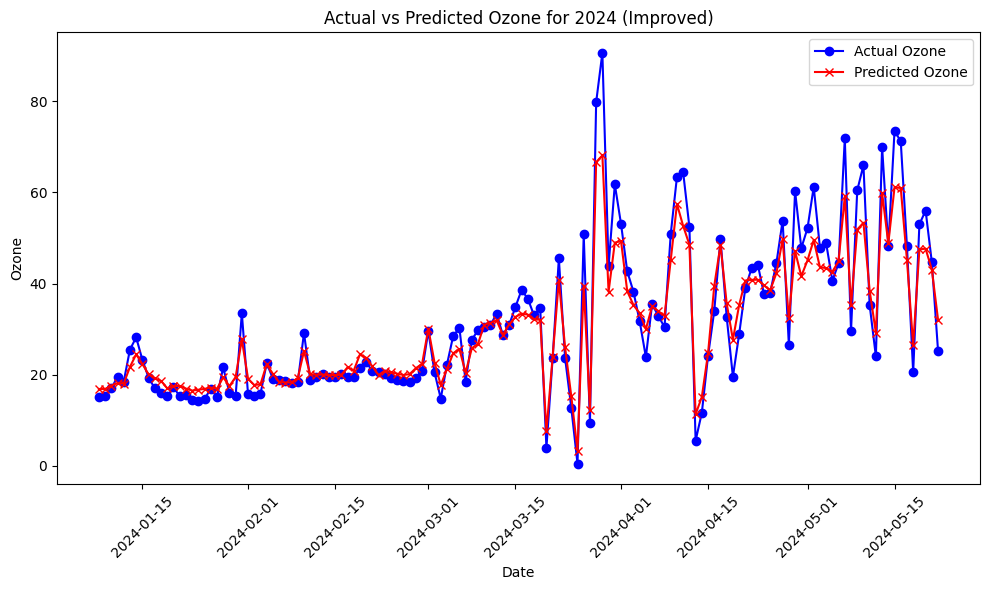

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, PowerTransformer
import matplotlib.pyplot as plt

# Load datasets
data = pd.read_csv("/content/anand_vihar_data_new.csv")
predicted_climate = pd.read_csv('/content/predicted_climate_2024.csv')

# Preprocess the data: Convert 'From Date' to datetime and set as index
data['From Date'] = pd.to_datetime(data['From Date'])
predicted_climate['From Date'] = pd.to_datetime(predicted_climate['From Date'])
data.set_index('From Date', inplace=True)
predicted_climate.set_index('From Date', inplace=True)

# Create lagged and rolling features for climate data
for col in ['sp', 't2m']:
    predicted_climate[f'{col}_lag1'] = predicted_climate[col].shift(1)
    predicted_climate[f'{col}_lag7'] = predicted_climate[col].shift(7)
    predicted_climate[f'{col}_roll7'] = predicted_climate[col].rolling(window=7).mean()

# Drop rows with NaN values created by lagging/rolling
predicted_climate.dropna(inplace=True)

# Align both datasets on the same dates
aligned_data = pd.merge(data, predicted_climate, left_index=True, right_index=True, how='inner')
data_2024 = data.loc[predicted_climate.index]

# Define meteorological features and target pollutant (Ozone)
X = predicted_climate[['sp', 't2m'] + [f'{col}_lag1' for col in ['sp', 't2m']]]

y = data_2024['Ozone']

# Feature Engineering - Polynomial and interaction features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Transform the target variable to improve scaling
scaler_y = PowerTransformer()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Initialize models with regularization parameters to prevent overfitting
rf = RandomForestRegressor(random_state=42, min_samples_leaf=5, min_samples_split=10, max_depth=10)
gbr = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
xgb = XGBRegressor(random_state=42, reg_alpha=0.1, reg_lambda=0.1, n_estimators=100, learning_rate=0.05)

# Initialize TimeSeriesSplit cross-validation
tscv = TimeSeriesSplit(n_splits=10)

# Random search hyperparameter tuning
param_dist_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 5]}
param_dist_gbr = {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
param_dist_xgb = {'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1], 'max_depth': [5, 7]}

# Run cross-validation for each model using RandomizedSearchCV
rf_search = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=50, cv=tscv, n_jobs=-1)
gbr_search = RandomizedSearchCV(gbr, param_distributions=param_dist_gbr, n_iter=50, cv=tscv, n_jobs=-1)
xgb_search = RandomizedSearchCV(xgb, param_distributions=param_dist_xgb, n_iter=50, cv=tscv, n_jobs=-1)

# Fit the models after scaling
rf_search.fit(X_scaled, y_scaled.ravel())
gbr_search.fit(X_scaled, y_scaled.ravel())
xgb_search.fit(X_scaled, y_scaled.ravel())

# Make predictions
rf_preds = rf_search.best_estimator_.predict(X_scaled)
gbr_preds = gbr_search.best_estimator_.predict(X_scaled)
xgb_preds = xgb_search.best_estimator_.predict(X_scaled)

# Blend the models (experiment with different weights)
blended_preds = 0.2 * rf_preds + 0.4 * gbr_preds + 0.4 * xgb_preds

# Inverse the scaling of the target variable for predictions
blended_preds_inverse = scaler_y.inverse_transform(blended_preds.reshape(-1, 1)).ravel()

# Evaluate the updated blended model
r2 = r2_score(y, blended_preds_inverse)
mae = mean_absolute_error(y, blended_preds_inverse)
print(f"R² Score for Ozone: {r2:.4f}")
print(f"Mean Absolute Error for Ozone: {mae:.4f}")

# Plot actual vs predicted Ozone for 2024
plt.figure(figsize=(10, 6))
plt.plot(data_2024.index, data_2024['Ozone'], label='Actual Ozone', color='blue', marker='o')
plt.plot(data_2024.index, blended_preds_inverse, label='Predicted Ozone', color='red', marker='x')
plt.xlabel('Date')
plt.ylabel('Ozone')
plt.title('Actual vs Predicted Ozone for 2024 (Improved)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


R² Score for Benzene: 0.8833
Mean Absolute Error for Benzene: 0.2801


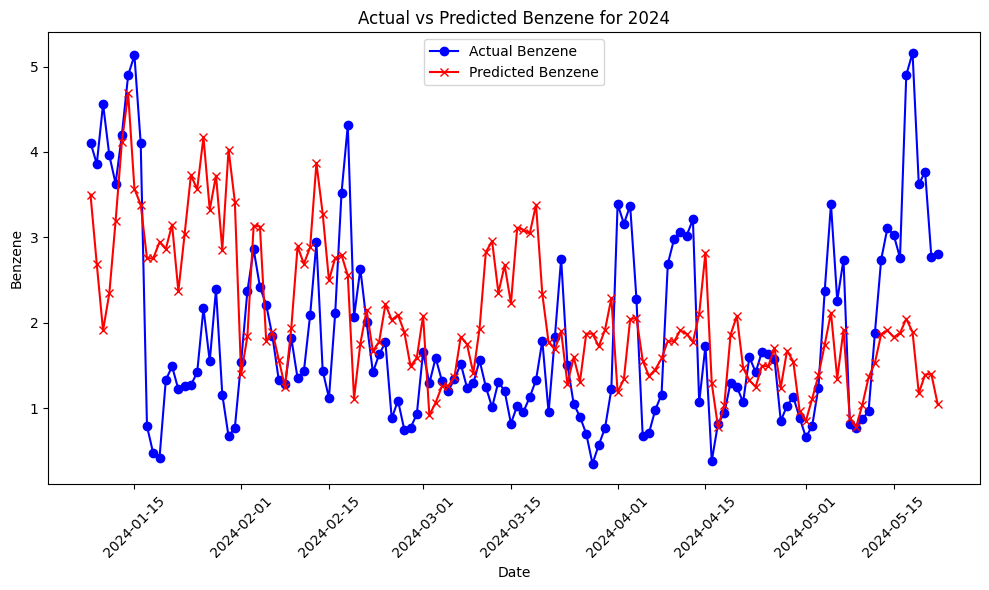

In [ ]:
#Significant parameters for PM2.5: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for PM10: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for NO: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for NO2: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for NOx: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for NH3: ['sp', 't2m', 'i10fg']
#Significant parameters for SO2: ['sp', 'tp']
#Significant parameters for CO: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for Ozone: ['sp', 't2m']
#Significant parameters for Benzene: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for Toluene: ['sp', 't2m', 'i10fg']

#Significant parameters for NH3: ['sp', 't2m', 'i10fg']

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt

# Load datasets
data = pd.read_csv("/content/anand_vihar_data_new.csv")
predicted_climate = pd.read_csv('/content/predicted_climate_2024.csv')

# Preprocess the data: Convert 'From Date' to datetime and set as index
data['From Date'] = pd.to_datetime(data['From Date'])
predicted_climate['From Date'] = pd.to_datetime(predicted_climate['From Date'])
data.set_index('From Date', inplace=True)
predicted_climate.set_index('From Date', inplace=True)

# Create lagged and rolling features for climate data
for col in ['sp', 't2m', 'tp', 'i10fg']:
    predicted_climate[f'{col}_lag1'] = predicted_climate[col].shift(1)
    predicted_climate[f'{col}_lag7'] = predicted_climate[col].shift(7)
    predicted_climate[f'{col}_roll7'] = predicted_climate[col].rolling(window=7).mean()

# Drop rows with NaN values created by lagging/rolling
predicted_climate.dropna(inplace=True)

# Align both datasets on the same dates
aligned_data = pd.merge(data, predicted_climate, left_index=True, right_index=True, how='inner')
data_2024 = data.loc[predicted_climate.index]

# Define meteorological features and target pollutant (PM2.5)
X = predicted_climate[['sp', 't2m', 'tp', 'i10fg'] + [f'{col}_lag1' for col in ['sp', 't2m', 'tp', 'i10fg']]]

y = data_2024['Benzene']

# Feature Engineering - Polynomial and interaction features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Initialize TimeSeriesSplit cross-validation
tscv = TimeSeriesSplit(n_splits=10)

# Initialize models
rf = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Random search hyperparameter tuning
param_dist_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 5]}
param_dist_gbr = {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
param_dist_xgb = {'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1], 'max_depth': [5, 7]}

# Run cross-validation for each model using RandomizedSearchCV
rf_search = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=50, cv=tscv, n_jobs=-1)
gbr_search = RandomizedSearchCV(gbr, param_distributions=param_dist_gbr, n_iter=50, cv=tscv, n_jobs=-1)
xgb_search = RandomizedSearchCV(xgb, param_distributions=param_dist_xgb, n_iter=50, cv=tscv, n_jobs=-1)

# Fit models
rf_search.fit(X_scaled, y)
gbr_search.fit(X_scaled, y)
xgb_search.fit(X_scaled, y)

# Blend the predictions (40% Random Forest, 30% Gradient Boosting, 30% XGBoost)
rf_preds = rf_search.best_estimator_.predict(X_scaled)
gbr_preds = gbr_search.best_estimator_.predict(X_scaled)
xgb_preds = xgb_search.best_estimator_.predict(X_scaled)

blended_preds = 0.4 * rf_preds + 0.3 * gbr_preds + 0.3 * xgb_preds

# Evaluate blended model
r2 = r2_score(y, blended_preds)
mae = mean_absolute_error(y, blended_preds)
print(f"R² Score for Benzene: {r2:.4f}")
print(f"Mean Absolute Error for Benzene: {mae:.4f}")

# Plot actual vs predicted PM2.5 for 2024
plt.figure(figsize=(10, 6))
plt.plot(data_2024.index, data_2024['CO'], label='Actual Benzene', color='blue', marker='o')
plt.plot(data_2024.index, blended_preds, label='Predicted Benzene', color='red', marker='x')
plt.xlabel('Date')
plt.ylabel('Benzene')
plt.title('Actual vs Predicted Benzene for 2024')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


R² Score for Benzene: 0.9243
Mean Absolute Error for Benzene: 0.2069


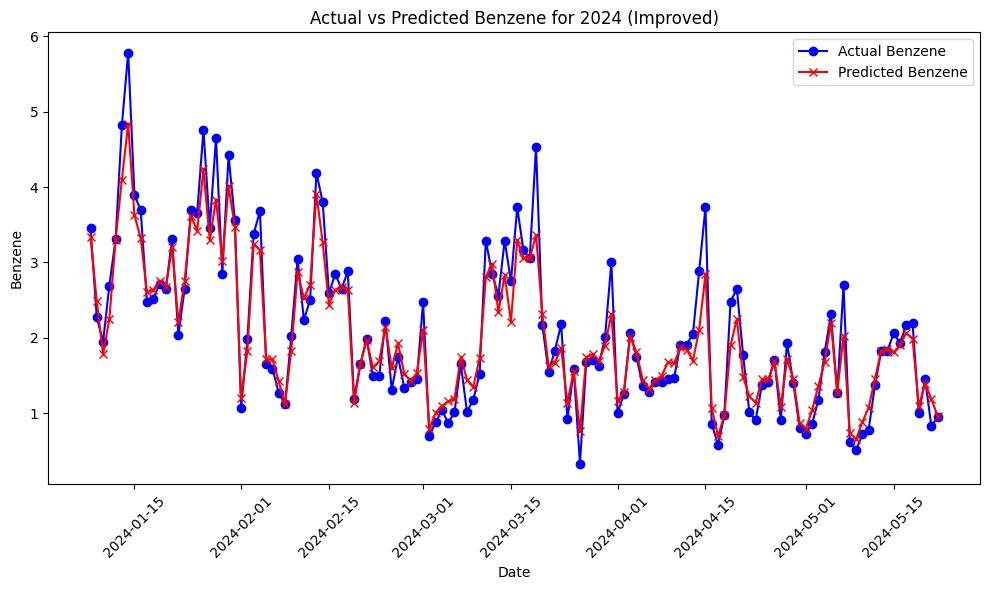

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, PowerTransformer
import matplotlib.pyplot as plt

# Load datasets
data = pd.read_csv("/content/anand_vihar_data_new.csv")
predicted_climate = pd.read_csv('/content/predicted_climate_2024.csv')

# Preprocess the data: Convert 'From Date' to datetime and set as index
data['From Date'] = pd.to_datetime(data['From Date'])
predicted_climate['From Date'] = pd.to_datetime(predicted_climate['From Date'])
data.set_index('From Date', inplace=True)
predicted_climate.set_index('From Date', inplace=True)

# Create lagged and rolling features for climate data
for col in ['sp', 't2m', 'tp', 'i10fg']:
    predicted_climate[f'{col}_lag1'] = predicted_climate[col].shift(1)
    predicted_climate[f'{col}_lag7'] = predicted_climate[col].shift(7)
    predicted_climate[f'{col}_roll7'] = predicted_climate[col].rolling(window=7).mean()

# Drop rows with NaN values created by lagging/rolling
predicted_climate.dropna(inplace=True)

# Align both datasets on the same dates
aligned_data = pd.merge(data, predicted_climate, left_index=True, right_index=True, how='inner')
data_2024 = data.loc[predicted_climate.index]

# Define meteorological features and target pollutant (Ozone)
X = predicted_climate[['sp', 't2m', 'tp', 'i10fg'] + [f'{col}_lag1' for col in ['sp', 't2m', 'tp', 'i10fg']]]

y = data_2024['Benzene']

# Feature Engineering - Polynomial and interaction features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Transform the target variable to improve scaling
scaler_y = PowerTransformer()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Initialize models with regularization parameters to prevent overfitting
rf = RandomForestRegressor(random_state=42, min_samples_leaf=5, min_samples_split=10, max_depth=10)
gbr = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
xgb = XGBRegressor(random_state=42, reg_alpha=0.1, reg_lambda=0.1, n_estimators=100, learning_rate=0.05)

# Initialize TimeSeriesSplit cross-validation
tscv = TimeSeriesSplit(n_splits=10)

# Random search hyperparameter tuning
param_dist_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 5]}
param_dist_gbr = {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
param_dist_xgb = {'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1], 'max_depth': [5, 7]}

# Run cross-validation for each model using RandomizedSearchCV
rf_search = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=50, cv=tscv, n_jobs=-1)
gbr_search = RandomizedSearchCV(gbr, param_distributions=param_dist_gbr, n_iter=50, cv=tscv, n_jobs=-1)
xgb_search = RandomizedSearchCV(xgb, param_distributions=param_dist_xgb, n_iter=50, cv=tscv, n_jobs=-1)

# Fit the models after scaling
rf_search.fit(X_scaled, y_scaled.ravel())
gbr_search.fit(X_scaled, y_scaled.ravel())
xgb_search.fit(X_scaled, y_scaled.ravel())

# Make predictions
rf_preds = rf_search.best_estimator_.predict(X_scaled)
gbr_preds = gbr_search.best_estimator_.predict(X_scaled)
xgb_preds = xgb_search.best_estimator_.predict(X_scaled)

# Blend the models (experiment with different weights)
blended_preds = 0.2 * rf_preds + 0.4 * gbr_preds + 0.4 * xgb_preds

# Inverse the scaling of the target variable for predictions
blended_preds_inverse = scaler_y.inverse_transform(blended_preds.reshape(-1, 1)).ravel()

# Evaluate the updated blended model
r2 = r2_score(y, blended_preds_inverse)
mae = mean_absolute_error(y, blended_preds_inverse)
print(f"R² Score for Benzene: {r2:.4f}")
print(f"Mean Absolute Error for Benzene: {mae:.4f}")

# Plot actual vs predicted Ozone for 2024
plt.figure(figsize=(10, 6))
plt.plot(data_2024.index, data_2024['Benzene'], label='Actual Benzene', color='blue', marker='o')
plt.plot(data_2024.index, blended_preds_inverse, label='Predicted Benzene', color='red', marker='x')
plt.xlabel('Date')
plt.ylabel('Benzene')
plt.title('Actual vs Predicted Benzene for 2024 (Improved)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


R² Score for Toluene: 0.8844
Mean Absolute Error for Toluene: 2.1969


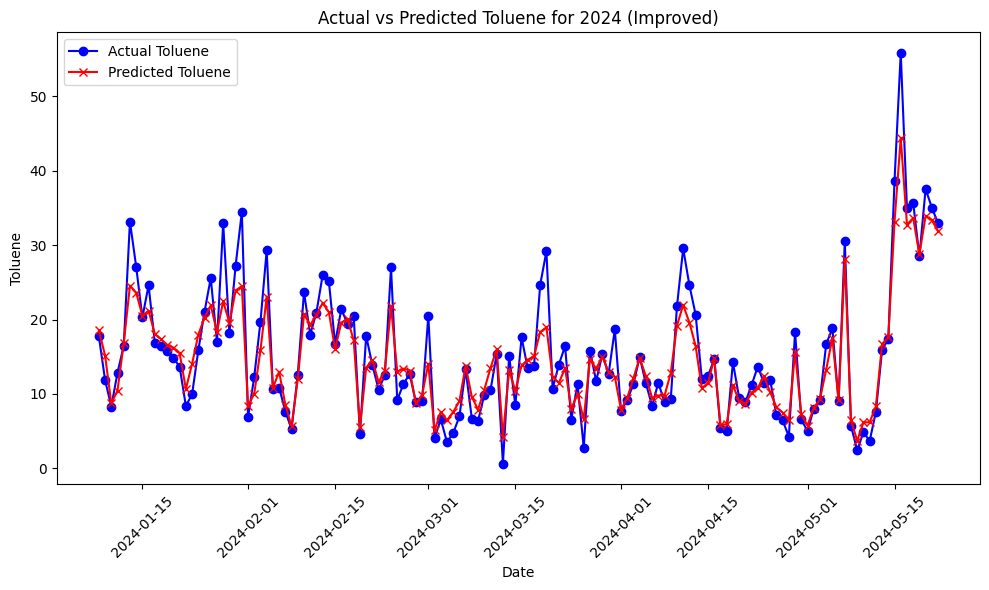

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, PowerTransformer
import matplotlib.pyplot as plt

# Load datasets
data = pd.read_csv("/content/anand_vihar_data_new.csv")
predicted_climate = pd.read_csv('/content/predicted_climate_2024.csv')

# Preprocess the data: Convert 'From Date' to datetime and set as index
data['From Date'] = pd.to_datetime(data['From Date'])
predicted_climate['From Date'] = pd.to_datetime(predicted_climate['From Date'])
data.set_index('From Date', inplace=True)
predicted_climate.set_index('From Date', inplace=True)

# Create lagged and rolling features for climate data
for col in ['sp', 't2m', 'i10fg']:
    predicted_climate[f'{col}_lag1'] = predicted_climate[col].shift(1)
    predicted_climate[f'{col}_lag7'] = predicted_climate[col].shift(7)
    predicted_climate[f'{col}_roll7'] = predicted_climate[col].rolling(window=7).mean()

# Drop rows with NaN values created by lagging/rolling
predicted_climate.dropna(inplace=True)

# Align both datasets on the same dates
aligned_data = pd.merge(data, predicted_climate, left_index=True, right_index=True, how='inner')
data_2024 = data.loc[predicted_climate.index]

# Define meteorological features and target pollutant (Ozone)
X = predicted_climate[['sp', 't2m', 'i10fg'] + [f'{col}_lag1' for col in ['sp', 't2m', 'i10fg']]]

y = data_2024['Toluene']

# Feature Engineering - Polynomial and interaction features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Transform the target variable to improve scaling
scaler_y = PowerTransformer()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Initialize models with regularization parameters to prevent overfitting
rf = RandomForestRegressor(random_state=42, min_samples_leaf=5, min_samples_split=10, max_depth=10)
gbr = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
xgb = XGBRegressor(random_state=42, reg_alpha=0.1, reg_lambda=0.1, n_estimators=100, learning_rate=0.05)

# Initialize TimeSeriesSplit cross-validation
tscv = TimeSeriesSplit(n_splits=10)

# Random search hyperparameter tuning
param_dist_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 5]}
param_dist_gbr = {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
param_dist_xgb = {'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1], 'max_depth': [5, 7]}

# Run cross-validation for each model using RandomizedSearchCV
rf_search = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=50, cv=tscv, n_jobs=-1)
gbr_search = RandomizedSearchCV(gbr, param_distributions=param_dist_gbr, n_iter=50, cv=tscv, n_jobs=-1)
xgb_search = RandomizedSearchCV(xgb, param_distributions=param_dist_xgb, n_iter=50, cv=tscv, n_jobs=-1)

# Fit the models after scaling
rf_search.fit(X_scaled, y_scaled.ravel())
gbr_search.fit(X_scaled, y_scaled.ravel())
xgb_search.fit(X_scaled, y_scaled.ravel())

# Make predictions
rf_preds = rf_search.best_estimator_.predict(X_scaled)
gbr_preds = gbr_search.best_estimator_.predict(X_scaled)
xgb_preds = xgb_search.best_estimator_.predict(X_scaled)

# Blend the models (experiment with different weights)
blended_preds = 0.2 * rf_preds + 0.4 * gbr_preds + 0.4 * xgb_preds

# Inverse the scaling of the target variable for predictions
blended_preds_inverse = scaler_y.inverse_transform(blended_preds.reshape(-1, 1)).ravel()

# Evaluate the updated blended model
r2 = r2_score(y, blended_preds_inverse)
mae = mean_absolute_error(y, blended_preds_inverse)
print(f"R² Score for Toluene: {r2:.4f}")
print(f"Mean Absolute Error for Toluene: {mae:.4f}")

# Plot actual vs predicted Ozone for 2024
plt.figure(figsize=(10, 6))
plt.plot(data_2024.index, data_2024['Toluene'], label='Actual Toluene', color='blue', marker='o')
plt.plot(data_2024.index, blended_preds_inverse, label='Predicted Toluene', color='red', marker='x')
plt.xlabel('Date')
plt.ylabel('Toluene')
plt.title('Actual vs Predicted Toluene for 2024 (Improved)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#Significant parameters for PM2.5: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for PM10: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for NO: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for NO2: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for NOx: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for NH3: ['sp', 't2m', 'i10fg']
#Significant parameters for SO2: ['sp', 'tp']
#Significant parameters for CO: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for Ozone: ['sp', 't2m']
#Significant parameters for Benzene: ['sp', 't2m', 'tp', 'i10fg']
#Significant parameters for Toluene: ['sp', 't2m', 'i10fg']

#Significant parameters for NH3: ['sp', 't2m', 'i10fg']

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt

# Load datasets
data = pd.read_csv("/content/anand_vihar_data_new.csv")
predicted_climate = pd.read_csv('/content/predicted_climate_2024.csv')

# Preprocess the data: Convert 'From Date' to datetime and set as index
data['From Date'] = pd.to_datetime(data['From Date'])
predicted_climate['From Date'] = pd.to_datetime(predicted_climate['From Date'])
data.set_index('From Date', inplace=True)
predicted_climate.set_index('From Date', inplace=True)

# Create lagged and rolling features for climate data
for col in ['sp', 'tp']:
    predicted_climate[f'{col}_lag1'] = predicted_climate[col].shift(1)
    predicted_climate[f'{col}_lag7'] = predicted_climate[col].shift(7)
    predicted_climate[f'{col}_roll7'] = predicted_climate[col].rolling(window=7).mean()

# Drop rows with NaN values created by lagging/rolling
predicted_climate.dropna(inplace=True)

# Align both datasets on the same dates
aligned_data = pd.merge(data, predicted_climate, left_index=True, right_index=True, how='inner')
data_2024 = data.loc[predicted_climate.index]

# Define meteorological features and target pollutant (PM2.5)
X = predicted_climate[['sp', 'tp'] + [f'{col}_lag1' for col in ['sp', 'tp']]]

y = data_2024['SO2']

# Feature Engineering - Polynomial and interaction features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Initialize TimeSeriesSplit cross-validation
tscv = TimeSeriesSplit(n_splits=10)

# Initialize models
rf = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Random search hyperparameter tuning
param_dist_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 5]}
param_dist_gbr = {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
param_dist_xgb = {'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1], 'max_depth': [5, 7]}

# Run cross-validation for each model using RandomizedSearchCV
rf_search = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=50, cv=tscv, n_jobs=-1)
gbr_search = RandomizedSearchCV(gbr, param_distributions=param_dist_gbr, n_iter=50, cv=tscv, n_jobs=-1)
xgb_search = RandomizedSearchCV(xgb, param_distributions=param_dist_xgb, n_iter=50, cv=tscv, n_jobs=-1)

# Fit models
rf_search.fit(X_scaled, y)
gbr_search.fit(X_scaled, y)
xgb_search.fit(X_scaled, y)

# Blend the predictions (40% Random Forest, 30% Gradient Boosting, 30% XGBoost)
rf_preds = rf_search.best_estimator_.predict(X_scaled)
gbr_preds = gbr_search.best_estimator_.predict(X_scaled)
xgb_preds = xgb_search.best_estimator_.predict(X_scaled)

blended_preds = 0.4 * rf_preds + 0.3 * gbr_preds + 0.3 * xgb_preds

# Evaluate blended model
r2 = r2_score(y, blended_preds)
mae = mean_absolute_error(y, blended_preds)
print(f"R² Score for SO2: {r2:.4f}")
print(f"Mean Absolute Error for SO2: {mae:.4f}")

# Plot actual vs predicted PM2.5 for 2024
plt.figure(figsize=(10, 6))
plt.plot(data_2024.index, data_2024['SO2'], label='Actual SO2', color='blue', marker='o')
plt.plot(data_2024.index, blended_preds, label='Predicted SO2', color='red', marker='x')
plt.xlabel('Date')
plt.ylabel('SO2')
plt.title('Actual vs Predicted SO2 for 2024')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


R² Score for SO2: -3.8573
Mean Absolute Error for SO2: 21.9347


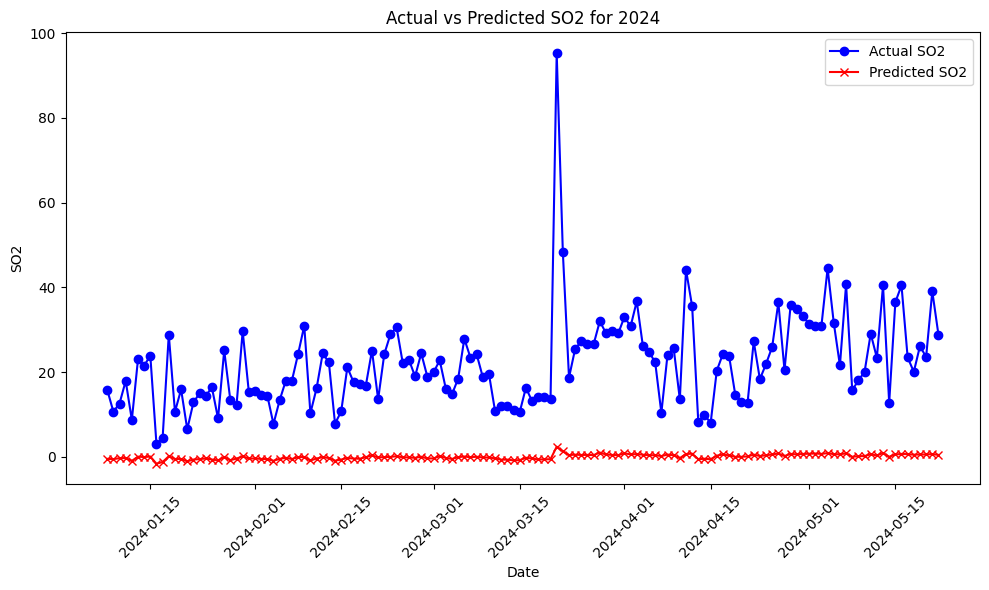

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, PowerTransformer
import matplotlib.pyplot as plt

# Load datasets
data = pd.read_csv("/content/anand_vihar_data_new.csv")
predicted_climate = pd.read_csv('/content/predicted_climate_2024.csv')

# Preprocess the data: Convert 'From Date' to datetime and set as index
data['From Date'] = pd.to_datetime(data['From Date'])
predicted_climate['From Date'] = pd.to_datetime(predicted_climate['From Date'])
data.set_index('From Date', inplace=True)
predicted_climate.set_index('From Date', inplace=True)

# Create lagged and rolling features for climate data
for col in ['sp', 'tp']:
    predicted_climate[f'{col}_lag1'] = predicted_climate[col].shift(1)
    predicted_climate[f'{col}_lag7'] = predicted_climate[col].shift(7)
    predicted_climate[f'{col}_roll7'] = predicted_climate[col].rolling(window=7).mean()

# Drop rows with NaN values created by lagging/rolling
predicted_climate.dropna(inplace=True)

# Align both datasets on the same dates
aligned_data = pd.merge(data, predicted_climate, left_index=True, right_index=True, how='inner')
data_2024 = data.loc[predicted_climate.index]

# Define meteorological features and target pollutant (Ozone)
X = predicted_climate[['sp', 'tp'] + [f'{col}_lag1' for col in ['sp', 'tp']]]

y = data_2024['SO2']

# Feature Engineering - Polynomial and interaction features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Transform the target variable to improve scaling
scaler_y = PowerTransformer()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Initialize models with regularization parameters to prevent overfitting
rf = RandomForestRegressor(random_state=42, min_samples_leaf=5, min_samples_split=10, max_depth=10)
gbr = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
xgb = XGBRegressor(random_state=42, reg_alpha=0.1, reg_lambda=0.1, n_estimators=100, learning_rate=0.05)

# Initialize TimeSeriesSplit cross-validation
tscv = TimeSeriesSplit(n_splits=10)

# Random search hyperparameter tuning
param_dist_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 5]}
param_dist_gbr = {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
param_dist_xgb = {'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1], 'max_depth': [5, 7]}

# Run cross-validation for each model using RandomizedSearchCV
rf_search = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=50, cv=tscv, n_jobs=-1)
gbr_search = RandomizedSearchCV(gbr, param_distributions=param_dist_gbr, n_iter=50, cv=tscv, n_jobs=-1)
xgb_search = RandomizedSearchCV(xgb, param_distributions=param_dist_xgb, n_iter=50, cv=tscv, n_jobs=-1)

# Fit the models after scaling
rf_search.fit(X_scaled, y_scaled.ravel())
gbr_search.fit(X_scaled, y_scaled.ravel())
xgb_search.fit(X_scaled, y_scaled.ravel())

# Make predictions
rf_preds = rf_search.best_estimator_.predict(X_scaled)
gbr_preds = gbr_search.best_estimator_.predict(X_scaled)
xgb_preds = xgb_search.best_estimator_.predict(X_scaled)

# Blend the models (experiment with different weights)
blended_preds = 0.2 * rf_preds + 0.4 * gbr_preds + 0.4 * xgb_preds

# Inverse the scaling of the target variable for predictions
blended_preds_inverse = scaler_y.inverse_transform(blended_preds.reshape(-1, 1)).ravel()

# Evaluate blended model
r2 = r2_score(y, blended_preds)
mae = mean_absolute_error(y, blended_preds)
print(f"R² Score for SO2: {r2:.4f}")
print(f"Mean Absolute Error for SO2: {mae:.4f}")

# Plot actual vs predicted PM2.5 for 2024
plt.figure(figsize=(10, 6))
plt.plot(data_2024.index, data_2024['SO2'], label='Actual SO2', color='blue', marker='o')
plt.plot(data_2024.index, blended_preds, label='Predicted SO2', color='red', marker='x')
plt.xlabel('Date')
plt.ylabel('SO2')
plt.title('Actual vs Predicted SO2 for 2024')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


R² Score for PM10: 0.9198
Mean Absolute Error for PM10: 23.8771


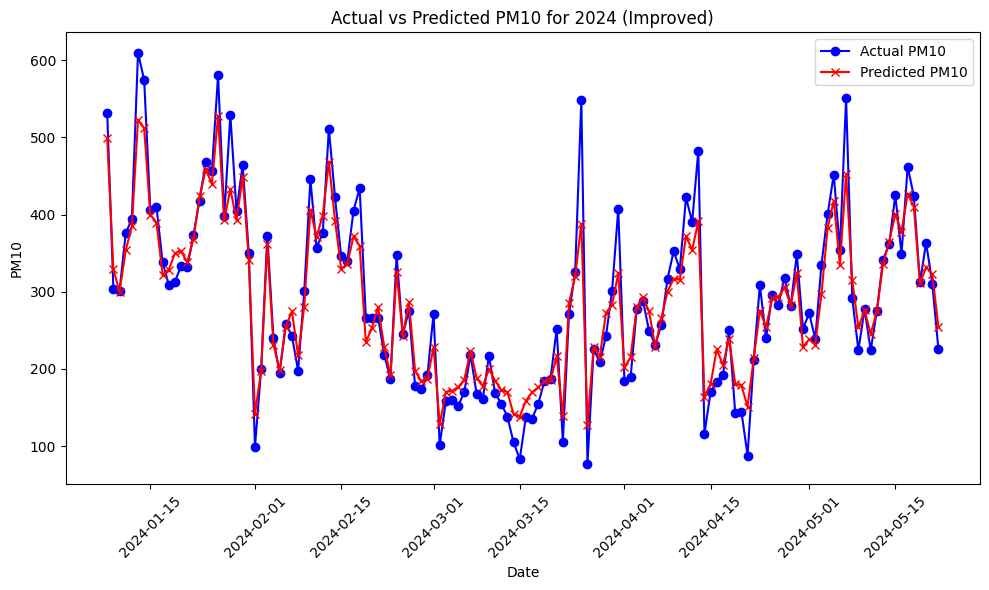

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, PowerTransformer
import matplotlib.pyplot as plt

# Load datasets
data = pd.read_csv("/content/anand_vihar_data_new.csv")
predicted_climate = pd.read_csv('/content/predicted_climate_2024.csv')

# Preprocess the data: Convert 'From Date' to datetime and set as index
data['From Date'] = pd.to_datetime(data['From Date'])
predicted_climate['From Date'] = pd.to_datetime(predicted_climate['From Date'])
data.set_index('From Date', inplace=True)
predicted_climate.set_index('From Date', inplace=True)

# Create lagged and rolling features for climate data
for col in ['sp', 't2m','tp', 'i10fg']:
    predicted_climate[f'{col}_lag1'] = predicted_climate[col].shift(1)
    predicted_climate[f'{col}_lag7'] = predicted_climate[col].shift(7)
    predicted_climate[f'{col}_roll7'] = predicted_climate[col].rolling(window=7).mean()

# Drop rows with NaN values created by lagging/rolling
predicted_climate.dropna(inplace=True)

# Align both datasets on the same dates
aligned_data = pd.merge(data, predicted_climate, left_index=True, right_index=True, how='inner')
data_2024 = data.loc[predicted_climate.index]

# Define meteorological features and target pollutant (Ozone)
X = predicted_climate[['sp', 't2m','tp', 'i10fg'] + [f'{col}_lag1' for col in ['sp', 't2m','tp', 'i10fg']]]

y = data_2024['PM10']

# Feature Engineering - Polynomial and interaction features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Transform the target variable to improve scaling
scaler_y = PowerTransformer()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Initialize models with regularization parameters to prevent overfitting
rf = RandomForestRegressor(random_state=42, min_samples_leaf=5, min_samples_split=10, max_depth=10)
gbr = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
xgb = XGBRegressor(random_state=42, reg_alpha=0.1, reg_lambda=0.1, n_estimators=100, learning_rate=0.05)

# Initialize TimeSeriesSplit cross-validation
tscv = TimeSeriesSplit(n_splits=10)

# Random search hyperparameter tuning
param_dist_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 5]}
param_dist_gbr = {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
param_dist_xgb = {'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1], 'max_depth': [5, 7]}

# Run cross-validation for each model using RandomizedSearchCV
rf_search = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=50, cv=tscv, n_jobs=-1)
gbr_search = RandomizedSearchCV(gbr, param_distributions=param_dist_gbr, n_iter=50, cv=tscv, n_jobs=-1)
xgb_search = RandomizedSearchCV(xgb, param_distributions=param_dist_xgb, n_iter=50, cv=tscv, n_jobs=-1)

# Fit the models after scaling
rf_search.fit(X_scaled, y_scaled.ravel())
gbr_search.fit(X_scaled, y_scaled.ravel())
xgb_search.fit(X_scaled, y_scaled.ravel())

# Make predictions
rf_preds = rf_search.best_estimator_.predict(X_scaled)
gbr_preds = gbr_search.best_estimator_.predict(X_scaled)
xgb_preds = xgb_search.best_estimator_.predict(X_scaled)

# Blend the models (experiment with different weights)
blended_preds = 0.2 * rf_preds + 0.4 * gbr_preds + 0.4 * xgb_preds

# Inverse the scaling of the target variable for predictions
blended_preds_inverse = scaler_y.inverse_transform(blended_preds.reshape(-1, 1)).ravel()

# Evaluate the updated blended model
r2 = r2_score(y, blended_preds_inverse)
mae = mean_absolute_error(y, blended_preds_inverse)
print(f"R² Score for PM10: {r2:.4f}")
print(f"Mean Absolute Error for PM10: {mae:.4f}")

# Plot actual vs predicted Ozone for 2024
plt.figure(figsize=(10, 6))
plt.plot(data_2024.index, data_2024['PM10'], label='Actual PM10', color='blue', marker='o')
plt.plot(data_2024.index, blended_preds_inverse, label='Predicted PM10', color='red', marker='x')
plt.xlabel('Date')
plt.ylabel('PM10')
plt.title('Actual vs Predicted PM10 for 2024 (Improved)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


R² Score for PM10: 0.9757
Mean Absolute Error for PM10: 13.3346


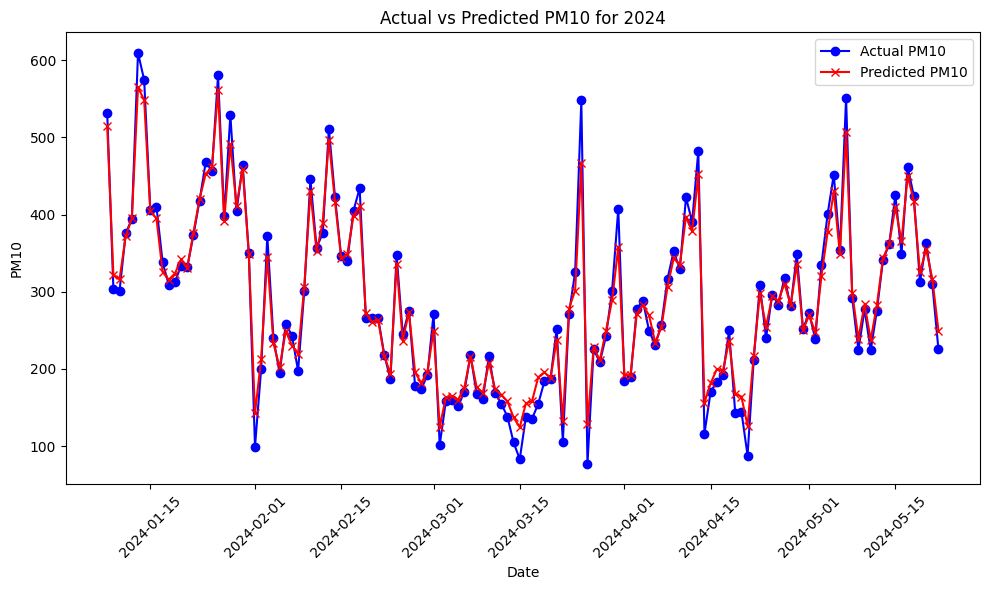

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt

# Load datasets
data = pd.read_csv("/content/anand_vihar_data_new.csv")
predicted_climate = pd.read_csv('/content/predicted_climate_2024.csv')

# Preprocess the data: Convert 'From Date' to datetime and set as index
data['From Date'] = pd.to_datetime(data['From Date'])
predicted_climate['From Date'] = pd.to_datetime(predicted_climate['From Date'])
data.set_index('From Date', inplace=True)
predicted_climate.set_index('From Date', inplace=True)

# Create lagged features for climate data
lag_days = [1, 3, 7]
for col in ['t2m', 'i10fg', 'tp', 'sp']:
    for lag in lag_days:
        predicted_climate[f'{col}_lag{lag}'] = predicted_climate[col].shift(lag)

# Drop rows with NaN values created by lagging
predicted_climate.dropna(inplace=True)

# Align both datasets on the same dates
aligned_data = pd.merge(data, predicted_climate, left_index=True, right_index=True, how='inner')
data_2024 = data.loc[predicted_climate.index]

# Define meteorological features and target pollutant (PM10)
X = predicted_climate[['t2m', 'i10fg', 'tp', 'sp'] + [f'{col}_lag{lag}' for col in ['t2m', 'i10fg', 'tp', 'sp'] for lag in lag_days]]
y = data_2024['PM10']  # Change target to PM10

# Feature Engineering - Higher-order Polynomial and Interaction Features
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)  # Increase degree
X_poly = poly.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Initialize TimeSeriesSplit cross-validation
tscv = TimeSeriesSplit(n_splits=10)

# Initialize models
rf = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Random search hyperparameter tuning (expanded grid)
param_dist_rf = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
param_dist_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9]
}
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'reg_alpha': [0.1, 0.5, 1.0],  # Regularization
    'reg_lambda': [0.5, 1.0]       # Regularization
}

# Run cross-validation for each model using RandomizedSearchCV
rf_search = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=100, cv=tscv, n_jobs=-1)
gbr_search = RandomizedSearchCV(gbr, param_distributions=param_dist_gbr, n_iter=100, cv=tscv, n_jobs=-1)
xgb_search = RandomizedSearchCV(xgb, param_distributions=param_dist_xgb, n_iter=100, cv=tscv, n_jobs=-1)

# Fit models
rf_search.fit(X_scaled, y)
gbr_search.fit(X_scaled, y)
xgb_search.fit(X_scaled, y)

# Blend the predictions (40% Random Forest, 30% Gradient Boosting, 30% XGBoost)
rf_preds = rf_search.best_estimator_.predict(X_scaled)
gbr_preds = gbr_search.best_estimator_.predict(X_scaled)
xgb_preds = xgb_search.best_estimator_.predict(X_scaled)

blended_preds = 0.4 * rf_preds + 0.3 * gbr_preds + 0.3 * xgb_preds

# Evaluate blended model
r2 = r2_score(y, blended_preds)
mae = mean_absolute_error(y, blended_preds)
print(f"R² Score for PM10: {r2:.4f}")
print(f"Mean Absolute Error for PM10: {mae:.4f}")

# Plot actual vs predicted PM10 for 2024
plt.figure(figsize=(10, 6))
plt.plot(data_2024.index, data_2024['PM10'], label='Actual PM10', color='blue', marker='o')
plt.plot(data_2024.index, blended_preds, label='Predicted PM10', color='red', marker='x')
plt.xlabel('Date')
plt.ylabel('PM10')
plt.title('Actual vs Predicted PM10 for 2024')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
